In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import random
import pylab
import numpy.distutils.system_info as sysinfo
import scipy.special
from random import randrange
import math
import sys
from sklearn.datasets import make_spd_matrix

In [2]:
def f(x): #compute the value of function f
    ans = 0
    for i in range(N):
        ans += math.log(1+math.exp(-b[i]*A[i].dot(x)))/N
    ans += lmbd/2*np.linalg.norm(x)**2
    return ans

def Hessian(x, k, j): #computation of the Hessian of f_i in point x
    i = k*m+j
    alpha = b[i]**2*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))**2
    ans = lmbd*np.eye(d) + alpha*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
    return ans

def coef_computation(x, k, j):
    i = m*k + j
    alpha = b[i]**2*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))**2
    return alpha

def gradient(x, k, j): #computation of the gradient of f_i in point x
    i = m*k + j
    alpha = -b[i]*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))
    ans = lmbd*x+alpha*A[i]
    return ans

def coef_comp(x, k, j):
    i = m*k + j
    alpha = -b[i]*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))
    return alpha



Считывание данных

In [3]:
N = 16100  # of elements
n = 100
m = 161
d = 123 # of features
lmbd = 0.1

b = np.zeros((N,))
A = np.zeros((N, d))

fle = open('a7a.txt', 'r')
for i, line in enumerate(fle):
    line = line.split()
    for c in line:
        if c == '+1':
            b[i] = 1
        elif c == '-1':
            b[i] = -1
        elif c == '\n':
            continue
        else:
            c = c.split(':')
            A[i][int(c[0]) - 1] = float(c[1])
mu = lmbd    

Константа Липшица градиента для CGD

In [169]:
L = 1/4*np.linalg.norm(A, 2)**2 
L

25322.463187067755

In [170]:
binom = np.zeros((d+1, d+1))
for i in range(d+1):
    binom[i,0] = 1
    binom[i,i] = 1
for i in range(2,d+1):
    for j in range(1, i):
        binom[i,j] = binom[i-1,j]+binom[i-1,j-1]

Оптимальное значение и решение

In [173]:
x_star = y
f(x_star)

0.4719062470490376

In [227]:
opt_1 = x_star
x_star

array([-2.28086852e-001, -1.15679596e-001,  1.25425822e-002,
        8.38769167e-002,  3.66362676e-002, -1.51698740e-001,
       -4.13471876e-002,  4.74982375e-002,  2.55455593e-002,
       -4.57865131e-003, -1.19807549e-002, -6.95385235e-004,
       -2.31287944e-004, -6.87121500e-002, -2.57807889e-002,
       -3.90507008e-002, -3.83125825e-002, -3.88544588e-002,
        7.99000439e-002, -8.02462398e-002, -4.46700960e-002,
       -1.65666874e-001,  4.53724957e-002, -1.04936037e-002,
       -7.70667035e-004, -2.64427888e-002, -3.25484213e-002,
       -1.44622998e-002,  7.50642347e-002, -1.07816505e-002,
       -3.77461517e-002,  3.91269521e-002, -2.20852405e-002,
       -4.26037415e-003, -1.92997023e-001, -1.65666874e-001,
       -8.02462398e-002, -1.12642707e-002,  2.39463726e-001,
        3.02572469e-001, -1.20747586e-001, -3.14224983e-001,
       -3.65839486e-002, -2.89964997e-002, -1.37172756e-002,
        9.87142432e-004,  1.37492159e-002, -4.95698093e-002,
       -1.15456043e-001,

# a7a dataset
## Logistic regression

In [174]:
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []


scaled_max_coef = []
bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.ones(d)*0.1 # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


for n_step in range(1000):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, 'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)
    
    # step of CNM with sparsification
    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(x_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*coef_computation(x_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)


    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)



    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    
    # GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global

Scaled Max Coef: 1.332540211834643 MaxCoef 1.332540211834643 St. NM: 1.332540211834643 Rnd.GD 1.332540211834643 St.GD: 1.332540211834643
Scaled Max Coef: 0.5607770136413295 MaxCoef 0.4869507591544093 St. NM: 0.5165721472121819 Rnd.GD 1.3324574197579313 St.GD: 1.3324566701139249
Scaled Max Coef: 0.4850253743794417 MaxCoef 0.4738602407701045 St. NM: 0.47444838829322666 Rnd.GD 1.3323744421203298 St.GD: 1.3323731354975703
Scaled Max Coef: 0.4721999165295769 MaxCoef 0.47228904790280163 St. NM: 0.47191058499184035 Rnd.GD 1.3322926478708725 St.GD: 1.3322896079857471
Scaled Max Coef: 0.4719063875656849 MaxCoef 0.4719823186487655 St. NM: 0.47190624706907425 Rnd.GD 1.3322114000167298 St.GD: 1.3322060875783657
Scaled Max Coef: 0.4719062470490707 MaxCoef 0.47192109262759246 St. NM: 0.4719062470490377 Rnd.GD 1.332131838345309 St.GD: 1.3321225742753853
Scaled Max Coef: 0.4719062470490382 MaxCoef 0.4719091109691352 St. NM: 0.4719062470490374 Rnd.GD 1.3320419026659471 St.GD: 1.3320390680767573
Scaled 

Scaled Max Coef: 0.4719062470490375 MaxCoef 0.4719062470490375 St. NM: 0.4719062470490375 Rnd.GD 1.3276546044400497 St.GD: 1.3277065340896173
Scaled Max Coef: 0.4719062470490378 MaxCoef 0.47190624704903766 St. NM: 0.4719062470490376 Rnd.GD 1.3275584796500057 St.GD: 1.3276234043372062
Scaled Max Coef: 0.4719062470490374 MaxCoef 0.4719062470490375 St. NM: 0.47190624704903755 Rnd.GD 1.3274787707050852 St.GD: 1.3275402816859034
Scaled Max Coef: 0.4719062470490375 MaxCoef 0.4719062470490375 St. NM: 0.4719062470490377 Rnd.GD 1.3274053467830051 St.GD: 1.3274571661356662
Scaled Max Coef: 0.4719062470490379 MaxCoef 0.47190624704903766 St. NM: 0.4719062470490377 Rnd.GD 1.3273232455480362 St.GD: 1.3273740576864186
Scaled Max Coef: 0.47190624704903744 MaxCoef 0.4719062470490375 St. NM: 0.47190624704903755 Rnd.GD 1.327245128244123 St.GD: 1.3272909563381043
Scaled Max Coef: 0.4719062470490376 MaxCoef 0.4719062470490375 St. NM: 0.4719062470490376 Rnd.GD 1.3271637412976576 St.GD: 1.3272078620906536
Sc

In [175]:
f_optimal = stand_nm[-1]
max_coef_scaled = np.array(max_coef_scaled) - f_optimal
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal

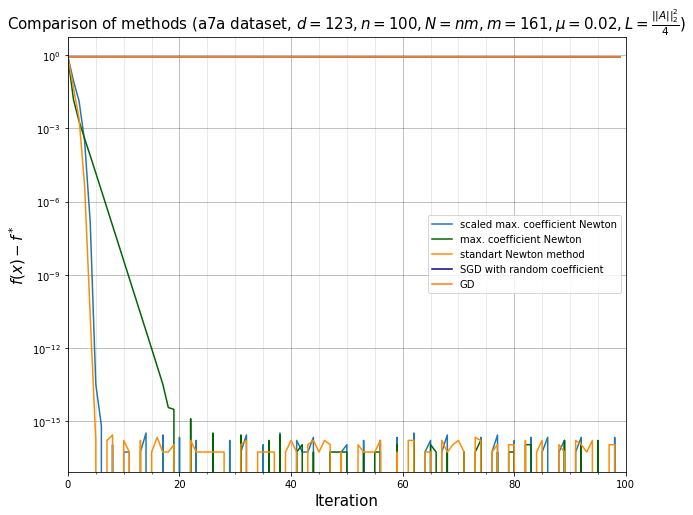

In [176]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 100])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_12.png')
plt.show()

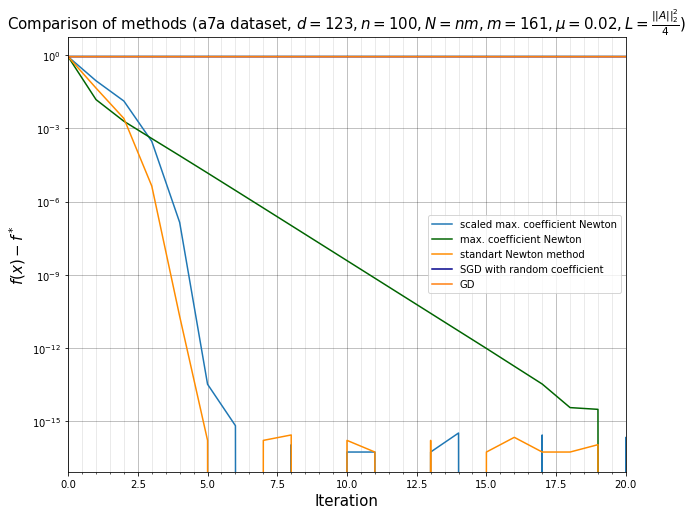

In [177]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 20])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_12.png')
plt.show()

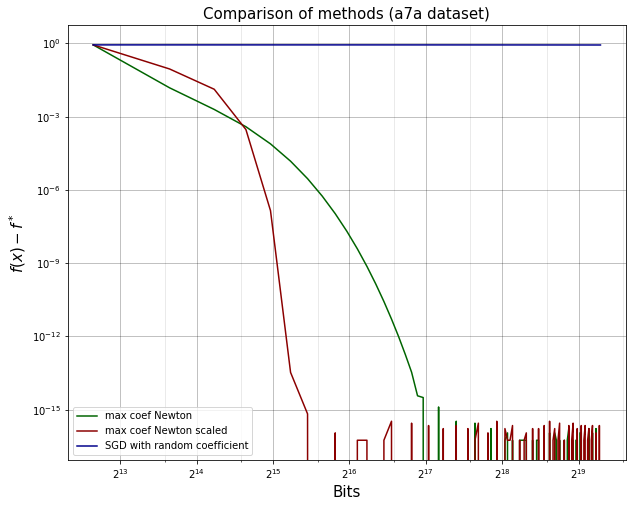

In [178]:
figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coef Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='max coef Newton scaled')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(-1), 1])AC
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (a7a dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_bits_1.png')
plt.show()

In [192]:
L = 161*mu
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []


scaled_max_coef = []
bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.ones(d)*0.1 # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


for n_step in range(20):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, 'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)
    
    # step of CNM with sparsification
    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(x_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*coef_computation(x_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)


    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)



    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    
    # GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global

Scaled Max Coef: 1.332540211834643 MaxCoef 1.332540211834643 St. NM: 1.332540211834643 Rnd.GD 1.332540211834643 St.GD: 1.332540211834643
Scaled Max Coef: 0.5607770136413295 MaxCoef 0.4869507591544093 St. NM: 0.5165721472121819 Rnd.GD 1.212158092908588 St.GD: 1.2057166933552919
Scaled Max Coef: 0.4850253743794417 MaxCoef 0.4738602407701045 St. NM: 0.47444838829322666 Rnd.GD 1.112735057996021 St.GD: 1.0966971538533137
Scaled Max Coef: 0.4721999165295769 MaxCoef 0.47228904790280163 St. NM: 0.47191058499184035 Rnd.GD 1.0172818816169282 St.GD: 1.0044554560982841
Scaled Max Coef: 0.4719063875656849 MaxCoef 0.4719823186487655 St. NM: 0.47190624706907425 Rnd.GD 0.9383815925430707 St.GD: 0.9274325338107977
Scaled Max Coef: 0.4719062470490707 MaxCoef 0.47192109262759246 St. NM: 0.4719062470490377 Rnd.GD 0.8658149362827801 St.GD: 0.8637575433039475
Scaled Max Coef: 0.4719062470490382 MaxCoef 0.4719091109691352 St. NM: 0.4719062470490374 Rnd.GD 0.814172918571467 St.GD: 0.8114669755274666
Scaled Ma

In [193]:
f_optimal = stand_nm[-1]
max_coef_scaled = np.array(max_coef_scaled) - f_optimal
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal

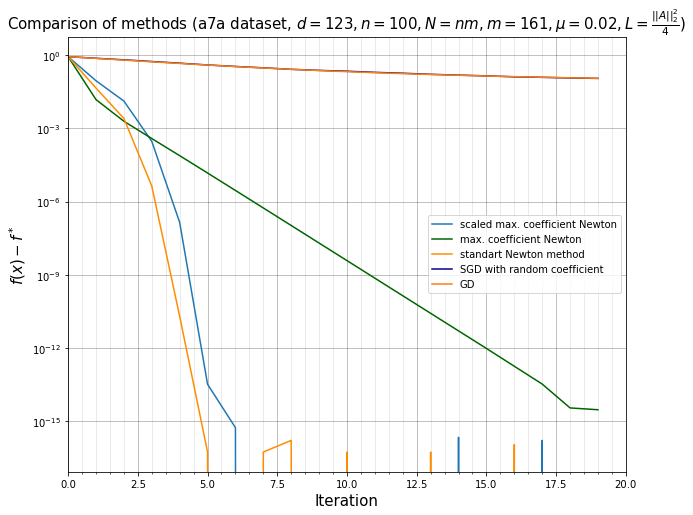

In [195]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 20])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_12222.png')
plt.show()

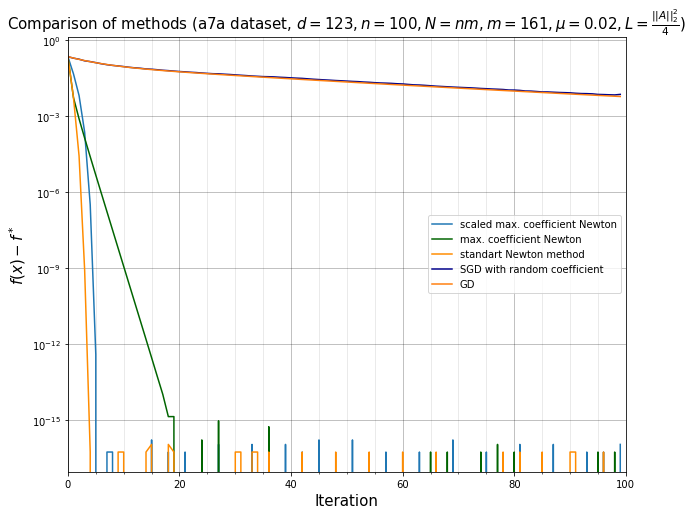

In [140]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 100])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_122.png')
plt.show()

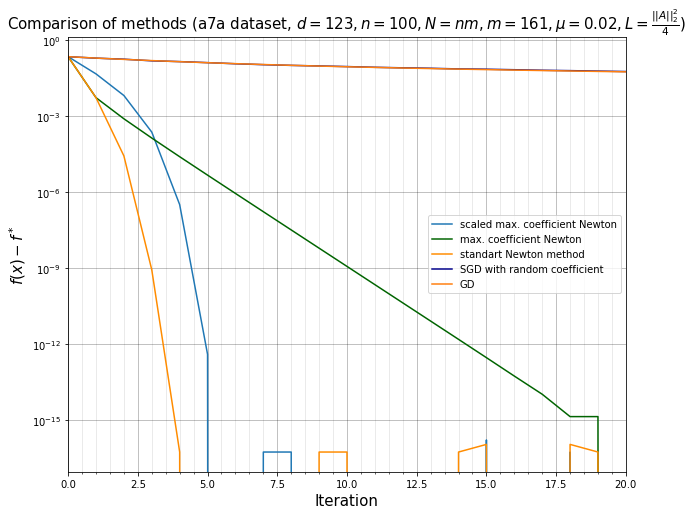

In [142]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 20])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_122.png')
plt.show()

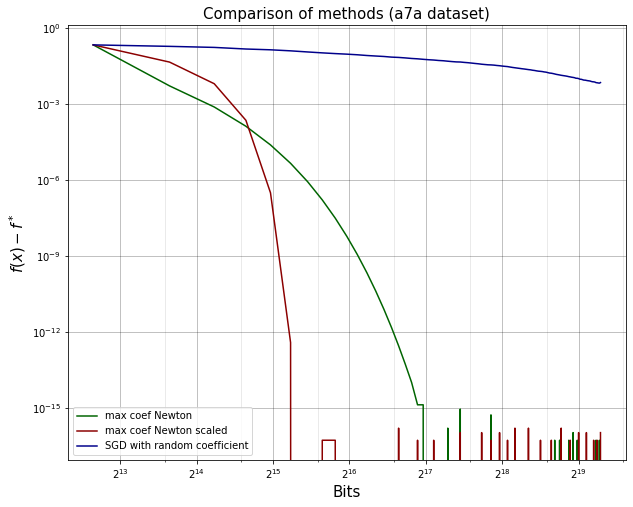

In [141]:
figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coef Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='max coef Newton scaled')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(-1), 1])AC
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (a7a dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_bits_122.png')
plt.show()

In [223]:
L = 161*mu
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []


scaled_max_coef = []
bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.ones(d)*0.25 # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


for n_step in range(20):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, 'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)
    
    # step of CNM with sparsification
    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(x_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*coef_computation(x_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)


    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)



    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    
    # GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global

Scaled Max Coef: 3.034947527370322 MaxCoef 3.034947527370322 St. NM: 3.034947527370322 Rnd.GD 3.034947527370322 St.GD: 3.034947527370322
Scaled Max Coef: 1.2460705031240722 MaxCoef 2.597871243166095 St. NM: 4.610123796627127 Rnd.GD 2.7876525138784736 St.GD: 2.7967825749373323
Scaled Max Coef: 0.7930958040323028 MaxCoef 1.7675674157910466 St. NM: 13.131279312181896 Rnd.GD 2.5319739149071587 St.GD: 2.568069781661169
Scaled Max Coef: 0.5572766852219041 MaxCoef 0.7064288590127179 St. NM: 28.859413116953718 Rnd.GD 2.3277257959571447 St.GD: 2.350384003798352
Scaled Max Coef: 0.480209462670533 MaxCoef 0.47877615730173767 St. NM: 13.149733851811625 Rnd.GD 2.113008003042596 St.GD: 2.1454740837587423
Scaled Max Coef: 0.47199472323568137 MaxCoef 0.47219073126494476 St. NM: 28.859617134284697 Rnd.GD 1.916128501430771 St.GD: 1.9551387710027006
Scaled Max Coef: 0.4719062570463527 MaxCoef 0.47195419309596065 St. NM: 13.149733851813734 Rnd.GD 1.743649145956725 St.GD: 1.7810364997168144
Scaled Max Coef

# Local convergence size investigation

Standard Newton starts to diverge if initial iterate is $x_0 = 0.15\cdot(1,\dotsc,1)^T$.

Scaled MaxCoef Newton starts to diverge if initial iterate ix $x_0 = 0.32\cdot(1,\dotsc, 1)^T$.

MaxCoef Newton starts to diverge if initial iterate ix $x_0 = 0.25\cdot(1,\dotsc, 1)^T$.

In [215]:
f_optimal = stand_nm[-1]
max_coef_scaled = np.array(max_coef_scaled) - f_optimal
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal

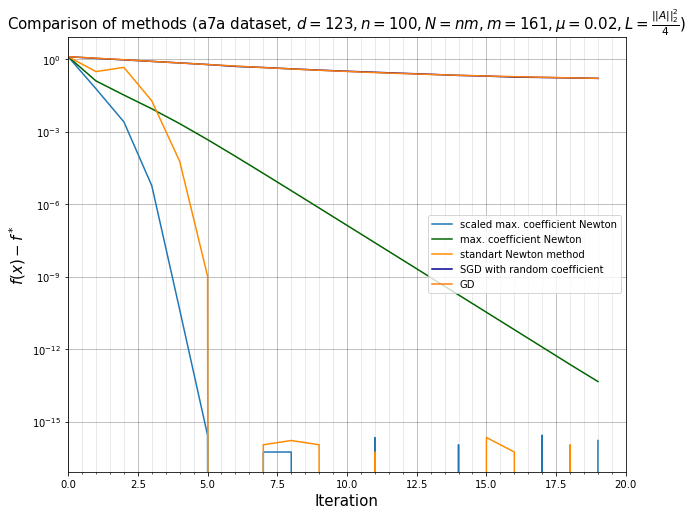

In [201]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 20])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_1223.png')
plt.show()

In [224]:
f_optimal = f(x_star)
max_coef_scaled = np.array(max_coef_scaled) - f_optimal
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal

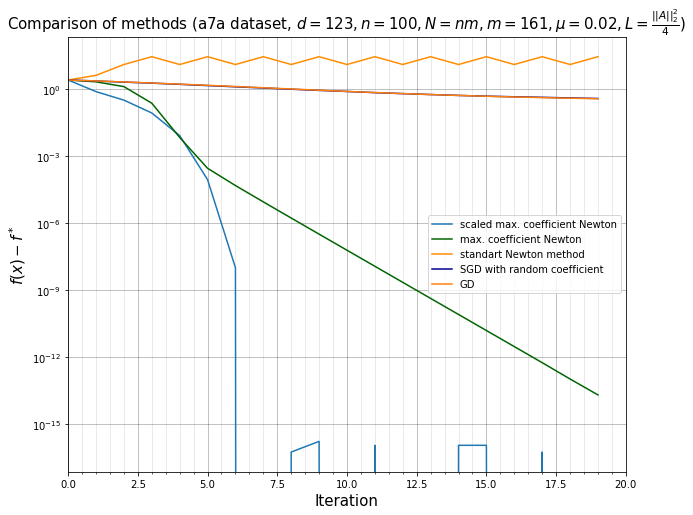

In [225]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 20])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_1224.png')
plt.show()

In [217]:
f_optimal = f(x_star)
max_coef_scaled = np.array(max_coef_scaled) - f_optimal
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal

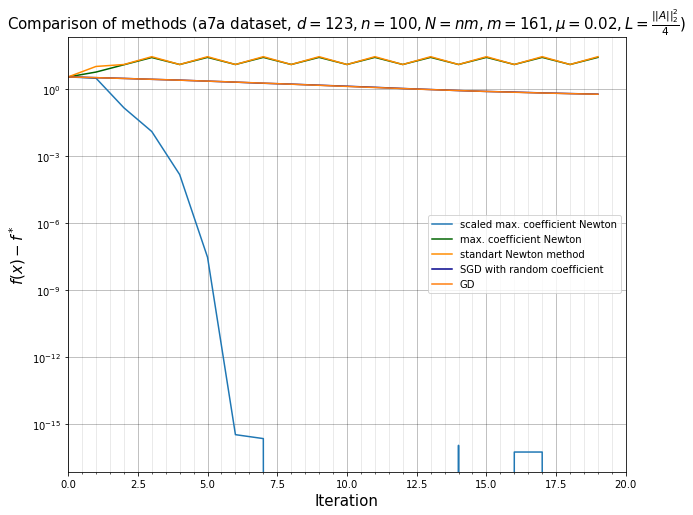

In [218]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 20])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_1224.png')
plt.show()

# Artificial dataset

## Logistic regression

In [304]:
N = 16100  # of elements
n = 100
m = 161
d = 123 # of features
lmbd = 0.0001

b = np.random.uniform(-1, 1, (N,))
A = np.random.uniform(-0.1, 0.1, (N, d))

mu = lmbd   

In [305]:
H = lmbd*np.eye(d)
x = np.ones(d)*150
for i in range(N):
    H += 1/N*(A[i].dot(x)-b[i])**2*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
L =np.linalg.eig(H)[0].max()
mu = lmbd

In [52]:
def f(x): #compute the value of function f
    ans = 0
    for i in range(N):
        ans += math.log(1+math.exp(-b[i]*A[i].dot(x)))/N
    ans += lmbd/2*np.linalg.norm(x)**2
    return ans

def Hessian(x, k, j): #computation of the Hessian of f_i in point x
    i = k*m+j
    alpha = b[i]**2*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))**2
    ans = lmbd*np.eye(d) + alpha*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
    return ans

def coef_computation(x, k, j):
    i = m*k + j
    alpha = b[i]**2*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))**2
    return alpha

def gradient(x, k, j): #computation of the gradient of f_i in point x
    i = m*k + j
    alpha = -b[i]*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))
    ans = lmbd*x+alpha*A[i]
    return ans

def coef_comp(x, k, j):
    i = m*k + j
    alpha = -b[i]*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))
    return alpha



In [309]:
y_star = y

In [312]:
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []


scaled_max_coef = []
bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.ones(d)*150 # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


for n_step in range(20):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, \
          'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)
    
    # step of CNM with sparsification
    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(y_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*coef_computation(y_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)


    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)



    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    
    #GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global

Scaled Max Coef: 157.40361348520688 MaxCoef 157.40361348520688 St. NM: 157.40361348520688 Rnd.GD 157.40361348520688 St.GD: 157.40361348520688
Scaled Max Coef: 82.53732294268835 MaxCoef 96.4738083435177 St. NM: 2.192815183048645 Rnd.GD 157.40324951482467 St.GD: 157.40325483859485
Scaled Max Coef: 43.442180142579 MaxCoef 62.50282060496264 St. NM: 1.4265451159256195 Rnd.GD 157.4028922912437 St.GD: 157.4028961927972
Scaled Max Coef: 22.891116478810922 MaxCoef 42.001198428057634 St. NM: 1.0764382756717132 Rnd.GD 157.40252935748623 St.GD: 157.40253754781375
Scaled Max Coef: 12.039720233364804 MaxCoef 28.94965238149436 St. NM: 0.843681511762451 Rnd.GD 157.40217222548517 St.GD: 157.4021789036444
Scaled Max Coef: 6.284709680271947 MaxCoef 20.282277423097597 St. NM: 0.7129219082907452 Rnd.GD 157.40181432625573 St.GD: 157.4018202602892
Scaled Max Coef: 3.2504273523573377 MaxCoef 14.473094268139073 St. NM: 0.690543786938424 Rnd.GD 157.401449049211 St.GD: 157.40146161774837
Scaled Max Coef: 1.68564

In [313]:
f_optimal = f(y_star)
max_coef_scaled = np.array(max_coef_scaled) - f_optimal
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal

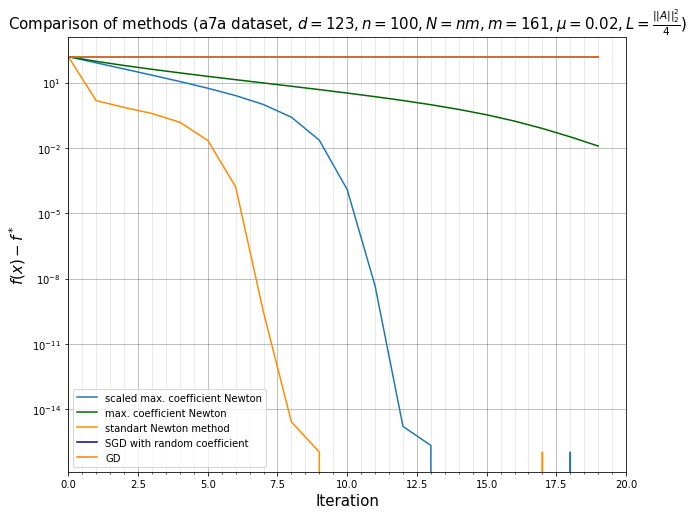

In [314]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

plt.xlim([-0.01, 20])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('artificial_dataset_1224.png')
plt.show()

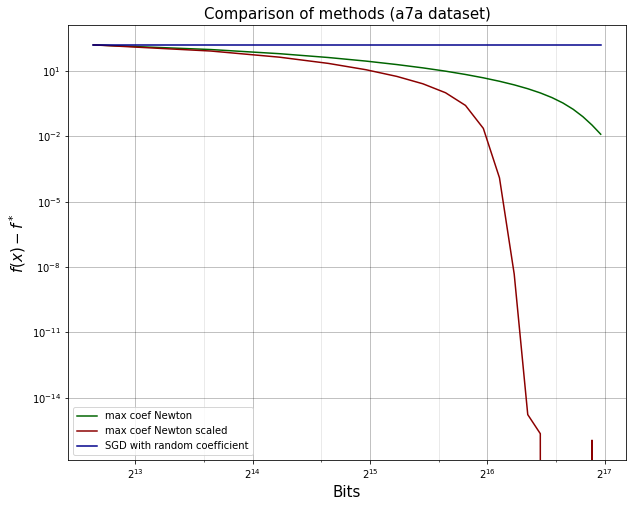

In [315]:
figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coef Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='max coef Newton scaled')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(-1), 1])AC
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (a7a dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('artificial_dataset_bits_1224.png')
plt.show()

# a8a dataset

In [137]:
def f(x): #compute the value of function f
    ans = 0
    for i in range(N):
        ans += math.log(1+math.exp(-b[i]*A[i].dot(x)))/N
    ans += lmbd/2*np.linalg.norm(x)**2
    return ans

def Hessian(x, k, j): #computation of the Hessian of f_i in point x
    i = k*m+j
    alpha = b[i]**2*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))**2
    ans = lmbd*np.eye(d) + alpha*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
    return ans

def coef_computation(x, k, j):
    i = m*k + j
    alpha = b[i]**2*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))**2
    return alpha

def gradient(x, k, j): #computation of the gradient of f_i in point x
    i = m*k + j
    alpha = -b[i]*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))
    ans = lmbd*x+alpha*A[i]
    return ans

def coef_comp(x, k, j):
    i = m*k + j
    alpha = -b[i]*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))
    return alpha

In [140]:
N = 22500  # of elements
n = 10
m = 2250
d = 123 # of features
lmbd = 1/(10**2*N)

b = np.zeros((N,))
A = np.zeros((N, d))

fle = open('a8a.txt', 'r')
for i, line in enumerate(fle):
    if i < N:
        line = line.split()
        for c in line:
            if c == '+1':
                b[i] = 1
            elif c == '-1':
                b[i] = -1
            elif c == '\n':
                continue
            else:
                c = c.split(':')
                A[i][int(c[0]) - 1] = float(c[1])
mu = lmbd    

In [141]:
H = lmbd*np.eye(d)
x = np.ones(d)*1
for i in range(N):
    H += 1/N*(A[i].dot(x)-b[i])**2*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
L = np.linalg.eig(H)[0].max()

In [146]:
y_star = y

In [147]:
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []


scaled_max_coef = []
bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.ones(d)*0.1 # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


for n_step in range(20):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, \
          'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)
    
    # step of CNM with sparsification
    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(y_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*coef_computation(y_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)


    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)



    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    
    #GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global

Scaled Max Coef: 1.2718196437211398 MaxCoef 1.2718196437211398 St. NM: 1.2718196437211398 Rnd.GD 1.2718196437211398 St.GD: 1.2718196437211398
Scaled Max Coef: 1.2705898194967074 MaxCoef 0.35214038326583547 St. NM: 0.35650734237693144 Rnd.GD 1.2707870545273747 St.GD: 1.270330279232155
Scaled Max Coef: 1.2694005025248865 MaxCoef 0.34263135407273676 St. NM: 0.32826425267624065 Rnd.GD 1.269129522404545 St.GD: 1.2688431449717454
Scaled Max Coef: 1.2682479510931841 MaxCoef 0.3389140206773192 St. NM: 0.32636754149793407 Rnd.GD 1.267556442355311 St.GD: 1.2673582411309139
Scaled Max Coef: 1.2671289136440522 MaxCoef 0.3364416306628035 St. NM: 0.3262663195373023 Rnd.GD 1.2668188102241966 St.GD: 1.2658755678872997
Scaled Max Coef: 1.2660405143346407 MaxCoef 0.33464013653163494 St. NM: 0.32626377771785525 Rnd.GD 1.265582189342243 St.GD: 1.2643951254051522
Scaled Max Coef: 1.2649801976816457 MaxCoef 0.3332733667016694 St. NM: 0.32626357930621064 Rnd.GD 1.2636896425575836 St.GD: 1.2629169138353362
Sc

In [148]:
f_optimal = f(y)
max_coef_scaled = np.array(max_coef_scaled) - f_optimal
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal

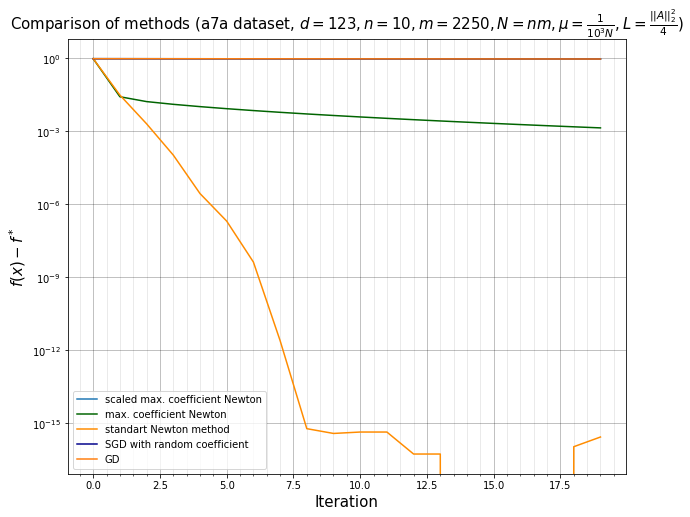

In [149]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled,
               label='scaled max. coefficient Newton')
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd, color='darkblue',
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD')

#plt.xlim([-0.01, 20])
#plt.ylim([10**(-20), 1])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 10, m = 2250, N = nm,\mu=\frac{1}{10^3N}, L = \frac{||A||^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a8a_dataset_1.png')
plt.show()

$---------------------------------------------------------------$

# artificial dataset

In [334]:
N = 16100  # of elements
n = 100
m = 161
d = 123 # of features
lmbd = 0.01

b = np.random.uniform(-1, 1, (N,))
A = np.random.uniform(-0.1, 0.1, (N, d))

mu = lmbd   

In [335]:
def f(x): #compute the value of function f
    ans = 0
    for i in range(N):
        ans += 1/12*(A[i].dot(x)-b[i])**4/N
    ans += lmbd/2*np.linalg.norm(x)**2
    return ans

def Hessian(x, k, j): #computation of the Hessian of f_i in point x
    i = k*m+j
    alpha = (A[i].dot(x)-b[i])**2
    ans = lmbd*np.eye(d) + alpha*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
    return ans

def coef_computation(x, k, j):
    i = m*k + j
    alpha = (A[i].dot(x)-b[i])**2
    return alpha

def gradient(x, k, j): #computation of the gradient of f_i in point x
    i = m*k + j
    alpha = 1/3*(A[i].dot(x)-b[i])**3
    ans = lmbd*x+alpha*A[i]
    return ans


H = lmbd*np.eye(d)
x = np.ones(d)*100
for i in range(N):
    H += 1/N*(A[i].dot(x)-b[i])**2*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
L =np.linalg.eig(H)[0].max()
mu = lmbd

## $f_i(x) = \frac{1}{12}(a_i^Tx - b_i)^4 + \frac{\lambda}{2}\|x\|^2$
## $\alpha_i(x) =  (a_i^Tx - b_i)^2$

In [338]:
y_star = y
f(y_star)
print(y_star)
print(f(y_star))

[ 5.16975445e-03 -5.00201369e-03  4.68825310e-03 -3.31146337e-03
 -2.66194655e-03 -4.39157499e-03 -6.08240114e-03 -5.56538405e-04
 -4.96413544e-03  6.40312128e-03 -6.18829775e-03  6.81871103e-03
 -3.15874844e-03 -9.33406488e-03 -1.60978360e-03  3.98047467e-03
 -1.68974291e-03  2.22049223e-03  3.66232833e-03  3.88547170e-03
 -8.67969904e-03 -1.60089853e-03  2.84623599e-03  1.56377491e-04
  5.27738232e-04  4.91350558e-03  8.81193820e-04 -6.51112640e-04
 -6.50985130e-03  4.97983229e-06  1.11166852e-02  5.54695497e-03
  6.95752690e-03  2.03310083e-03  2.68202615e-03 -8.10680003e-04
  9.50778031e-04  1.13277804e-02  2.86341275e-03 -2.89765676e-03
  1.26459541e-03  4.51296637e-04 -2.94523178e-03  1.34376017e-03
  1.55803276e-03  2.90400963e-03  6.48593136e-03 -3.11214082e-03
 -2.22782769e-03  1.01078607e-03  1.03230007e-02  4.38023938e-04
 -6.45668929e-03 -8.88196260e-03  8.04860817e-03  7.80376751e-03
  2.23176185e-03 -5.92249797e-03  4.32913448e-03  8.96340898e-03
 -6.03857465e-04 -2.31378

In [339]:
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []
iterates_max = []
iterates_nm = []
iterates_gd = []
iterates_rand = []


bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
scaled_max_coef = []
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.ones(d)*100 # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


iterates_max.append(x)
iterates_nm.append(y)
iterates_rand.append(z)
iterates_gd.append(t)


for n_step in range(1000):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, 'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)

    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)
    iterates_max.append(x)
    
        

    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(y_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*coef_computation(y_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)
    


    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    iterates_nm.append(y)

Scaled Max Coef: 4222339.255730826 MaxCoef 4222339.255730826 St. NM: 4222339.255730826 Rnd.GD 4222339.255730826 St.GD: 4222339.255730826
Scaled Max Coef: 4222338.620095071 MaxCoef 2596788.250765542 St. NM: 834824.478628106 Rnd.GD 4222339.255730826 St.GD: 4222339.255730826
Scaled Max Coef: 4222337.984459505 MaxCoef 1595619.4747794925 St. NM: 165250.34115988892 Rnd.GD 4222339.255730826 St.GD: 4222339.255730826
Scaled Max Coef: 4222337.348824115 MaxCoef 979507.3201475028 St. NM: 32795.30650473933 Rnd.GD 4222339.255730826 St.GD: 4222339.255730826
Scaled Max Coef: 4222336.713188907 MaxCoef 600685.2277114148 St. NM: 6545.388946168894 Rnd.GD 4222339.255730826 St.GD: 4222339.255730826
Scaled Max Coef: 4222336.077553829 MaxCoef 367980.21526349615 St. NM: 1322.0390936920287 Rnd.GD 4222339.255730826 St.GD: 4222339.255730826
Scaled Max Coef: 4222335.441919004 MaxCoef 225208.7511800182 St. NM: 273.3211302603195 Rnd.GD 4222339.255730826 St.GD: 4222339.255730826
Scaled Max Coef: 4222334.806284339 Max

KeyboardInterrupt: 

In [340]:
f_optimal = stand_nm[-1]
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal
max_coef_scaled = np.array(max_coef_scaled) - f_optimal

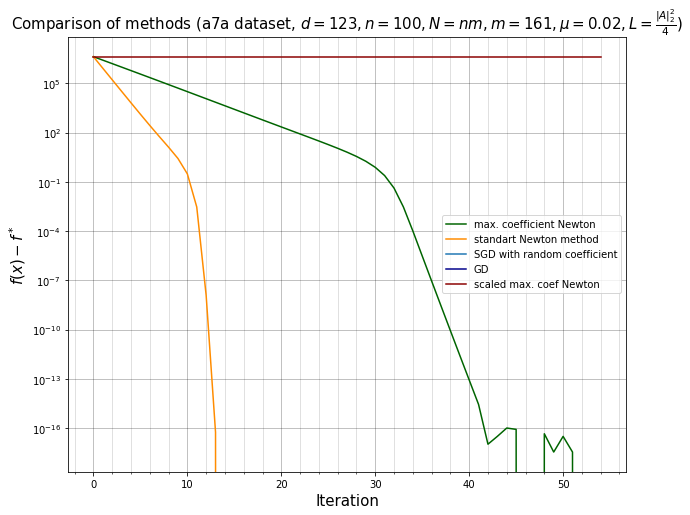

In [342]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd,
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD', color='darkblue')
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled, color='darkred', label='scaled max. coef Newton')

#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(2), 10**(3)])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{\|A\|^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.3)
plt.savefig('artificial_dataset_5.png')
plt.show()

# artificial dataset

## $f_(x) = \frac{1}{2}(a_i^Tx-b_i)^2$ with error

In [355]:
N = 16100  # of elements
n = 100
m = 161
d = 123 # of features
lmbd = 0.01

b = np.random.uniform(-1, 1, (N,))
A = np.random.uniform(-0, 100, (N, d))

mu = lmbd   

In [351]:
def f(x): #compute the value of function f
    ans = 0
    for i in range(N):
        ans += 1/2*(A[i].dot(x)-b[i])**2/N
    ans += lmbd/2*np.linalg.norm(x)**2
    return ans

def Hessian(x, k, j): #computation of the Hessian of f_i in point x
    i = k*m+j
    alpha = 1
    ans = lmbd*np.eye(d) + alpha*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
    return ans

def coef_computation(x, k, j):
    i = m*k + j
    alpha = 1
    return alpha

def gradient(x, k, j): #computation of the gradient of f_i in point x
    i = m*k + j
    alpha = (A[i].dot(x)-b[i])
    ans = lmbd*x+alpha*A[i]
    return ans


H = lmbd*np.eye(d)
x = np.ones(d)*100
for i in range(N):
    H += 1/N*(A[i].dot(x)-b[i])**2*A[i].reshape((d,1)).dot(A[i].reshape(1,d))

L = np.linalg.eig(H)[0].max().real
mu = lmbd

In [358]:
y_star = y
f(y_star)
y_star

array([-6.97775648e-05, -1.02022184e-04, -1.93921911e-04, -9.16651856e-05,
        2.29310706e-04,  1.86398361e-04,  6.99878411e-05, -2.34858592e-04,
       -6.86045643e-05, -2.63608104e-06,  3.14812288e-04, -1.22621224e-04,
       -3.59719451e-04, -9.00226205e-05, -8.77173219e-05, -1.28782200e-04,
       -3.96972816e-05, -2.73559821e-05, -2.10006556e-04, -3.29041654e-05,
        2.28562685e-04, -4.63192813e-04,  7.03413831e-05, -2.46586974e-04,
       -1.34029759e-04, -1.79002812e-05,  4.57563622e-05, -3.35743114e-05,
        2.76224027e-04,  5.39415534e-05,  2.63447299e-06, -2.11057913e-05,
        8.37155867e-05, -8.49208346e-06, -6.61779298e-05, -1.43169129e-04,
       -3.95136925e-05,  2.39819808e-04,  1.33017646e-04,  9.50765834e-05,
        2.34284561e-04, -2.38406960e-04, -1.40224413e-04,  5.80576004e-05,
       -1.13766035e-04,  7.08258843e-05,  1.88059584e-04, -7.28247036e-05,
       -1.66531050e-05, -1.60148863e-04,  7.88179830e-05,  5.76929778e-05,
       -2.90695688e-04, -

In [359]:
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []
iterates_max = []
iterates_nm = []
iterates_gd = []
iterates_rand = []


bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
scaled_max_coef = []
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.random.uniform(0, 150, d) # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


iterates_max.append(x)
iterates_nm.append(y)
iterates_rand.append(z)
iterates_gd.append(t)


for n_step in range(20):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, 'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)

    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)
    iterates_max.append(x)
    
        

    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(y_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += (max_coef+np.random.uniform(-0.9,0.9))*coef_computation(y_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)
    


    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    iterates_nm.append(y)
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    iterates_rand.append(z)

    
    # GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global
    iterates_gd.append(t)

Scaled Max Coef: 109258411529.77013 MaxCoef 109258411529.77013 St. NM: 109258411529.77013 Rnd.GD 109258411529.77013 St.GD: 109258411529.77013
Scaled Max Coef: 212887108.81021264 MaxCoef 0.16613796458762584 St. NM: 0.166137964587626 Rnd.GD 109258405857.36537 St.GD: 109258405836.45126
Scaled Max Coef: 476713.6380910491 MaxCoef 0.16613796458762492 St. NM: 0.1661379645876248 Rnd.GD 109258400146.52293 St.GD: 109258400143.13086
Scaled Max Coef: 984.2241357148275 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 109258394447.78072 St.GD: 109258394449.81161
Scaled Max Coef: 2.382895069966153 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 109258388750.85616 St.GD: 109258388756.49403
Scaled Max Coef: 0.17006749217600017 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762486 Rnd.GD 109258383065.36554 St.GD: 109258383063.17497
Scaled Max Coef: 0.16614919664737787 MaxCoef 0.16613796458762492 St. NM: 0.16613796458762486 Rnd.GD 109258377413.95363 St.GD: 109258377369.85693
Sca

In [360]:
f_optimal = stand_nm[-1]
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal
max_coef_scaled = np.array(max_coef_scaled) - f_optimal

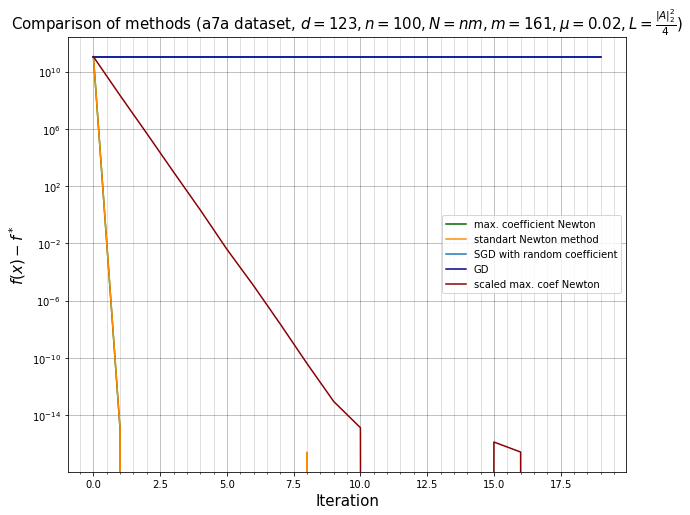

In [361]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd,
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD', color='darkblue')
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled, color='darkred', label='scaled max. coef Newton')

#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(2), 10**(3)])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{\|A\|^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.3)
plt.savefig('artificial_dataset_6.png')
plt.show()

In [363]:
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []
iterates_max = []
iterates_nm = []
iterates_gd = []
iterates_rand = []


bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
scaled_max_coef = []
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.random.uniform(0, 150, d) # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


iterates_max.append(x)
iterates_nm.append(y)
iterates_rand.append(z)
iterates_gd.append(t)


for n_step in range(200):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, 'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)

    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)
    iterates_max.append(x)
    
        

    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(y_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += (max_coef+np.random.uniform(-0.5,5))*coef_computation(y_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)
    


    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    iterates_nm.append(y)
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    iterates_rand.append(z)

    
    # GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global
    iterates_gd.append(t)

Scaled Max Coef: 129290275471.01794 MaxCoef 129290275471.01794 St. NM: 129290275471.01794 Rnd.GD 129290275471.01794 St.GD: 129290275471.01794
Scaled Max Coef: 61867304587.712425 MaxCoef 0.1661379645876259 St. NM: 0.16613796458762448 Rnd.GD 129290268725.79318 St.GD: 129290268732.22928
Scaled Max Coef: 29741912574.176956 MaxCoef 0.16613796458762495 St. NM: 0.16613796458762492 Rnd.GD 129290262020.91295 St.GD: 129290261993.44067
Scaled Max Coef: 14198467031.640898 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 129290255227.57289 St.GD: 129290255254.65349
Scaled Max Coef: 6776659404.535182 MaxCoef 0.16613796458762486 St. NM: 0.16613796458762492 Rnd.GD 129290248485.11404 St.GD: 129290248515.86618
Scaled Max Coef: 3210557052.97317 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 129290241754.12506 St.GD: 129290241777.07867
Scaled Max Coef: 1549333085.5049446 MaxCoef 0.16613796458762492 St. NM: 0.1661379645876249 Rnd.GD 129290234967.99281 St.GD: 129290235038.29227
Sca

Scaled Max Coef: 0.1661380018671164 MaxCoef 0.16613796458762492 St. NM: 0.1661379645876249 Rnd.GD 129289885163.46248 St.GD: 129289884621.86401
Scaled Max Coef: 0.16613798245450254 MaxCoef 0.16613796458762486 St. NM: 0.1661379645876249 Rnd.GD 129289878466.31209 St.GD: 129289877883.09563
Scaled Max Coef: 0.16613797308039627 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762486 Rnd.GD 129289871757.83745 St.GD: 129289871144.3276
Scaled Max Coef: 0.16613796866848704 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762492 Rnd.GD 129289865265.91833 St.GD: 129289864405.5599
Scaled Max Coef: 0.16613796654257906 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 129289858622.86865 St.GD: 129289857666.79268
Scaled Max Coef: 0.16613796552074625 MaxCoef 0.16613796458762486 St. NM: 0.16613796458762492 Rnd.GD 129289851824.86314 St.GD: 129289850928.02646
Scaled Max Coef: 0.16613796503535766 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762486 Rnd.GD 129289845121.08102 St.GD: 129289844189.2

Scaled Max Coef: 0.16613796458762425 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762492 Rnd.GD 129289495105.82877 St.GD: 129289493773.89267
Scaled Max Coef: 0.1661379645876248 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 129289488222.15297 St.GD: 129289487035.14473
Scaled Max Coef: 0.16613796458762478 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 129289481432.76183 St.GD: 129289480296.3967
Scaled Max Coef: 0.1661379645876246 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762492 Rnd.GD 129289474681.34193 St.GD: 129289473557.65025
Scaled Max Coef: 0.16613796458762498 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 129289467925.61902 St.GD: 129289466818.90317
Scaled Max Coef: 0.16613796458762434 MaxCoef 0.16613796458762486 St. NM: 0.1661379645876249 Rnd.GD 129289461131.8156 St.GD: 129289460080.15646
Scaled Max Coef: 0.16613796458762461 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762486 Rnd.GD 129289454591.84201 St.GD: 129289453341.41121

Scaled Max Coef: 0.1661379645876249 MaxCoef 0.16613796458762492 St. NM: 0.16613796458762486 Rnd.GD 129289104786.73903 St.GD: 129289102927.10292
Scaled Max Coef: 0.1661379645876249 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762492 Rnd.GD 129289098055.20248 St.GD: 129289096188.37431
Scaled Max Coef: 0.16613796458762486 MaxCoef 0.16613796458762492 St. NM: 0.16613796458762486 Rnd.GD 129289091420.14198 St.GD: 129289089449.64809
Scaled Max Coef: 0.1661379645876249 MaxCoef 0.16613796458762486 St. NM: 0.1661379645876249 Rnd.GD 129289084567.88387 St.GD: 129289082710.92088
Scaled Max Coef: 0.1661379645876249 MaxCoef 0.1661379645876249 St. NM: 0.1661379645876249 Rnd.GD 129289077765.204 St.GD: 129289075972.1955
Scaled Max Coef: 0.1661379645876249 MaxCoef 0.1661379645876249 St. NM: 0.16613796458762486 Rnd.GD 129289071016.50137 St.GD: 129289069233.4686
Scaled Max Coef: 0.1661379645876249 MaxCoef 0.16613796458762492 St. NM: 0.16613796458762486 Rnd.GD 129289064258.62714 St.GD: 129289062494.74414


In [365]:
f_optimal = stand_nm[-1]
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal
max_coef_scaled = np.array(max_coef_scaled) - f_optimal

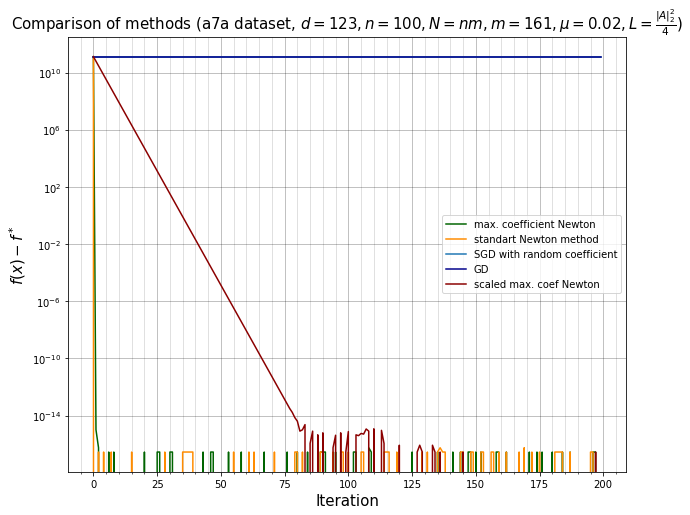

In [366]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd,
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD', color='darkblue')
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled, color='darkred', label='scaled max. coef Newton')

#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(2), 10**(3)])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{\|A\|^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.3)
plt.savefig('artificial_dataset_6.png')
plt.show()

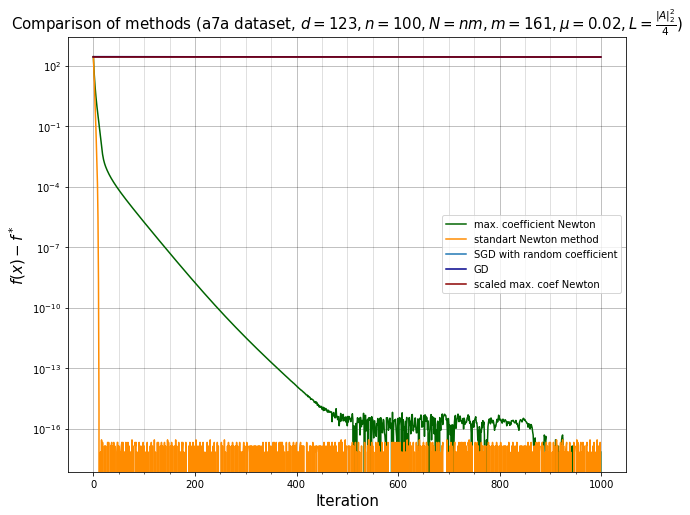

In [33]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd,
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD', color='darkblue')
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled, color='darkred', label='scaled max. coef Newton')

#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(-4), 10**(3)])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (a7a dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{\|A\|^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.3)
plt.savefig('a7a_dataset_5.png')
plt.show()

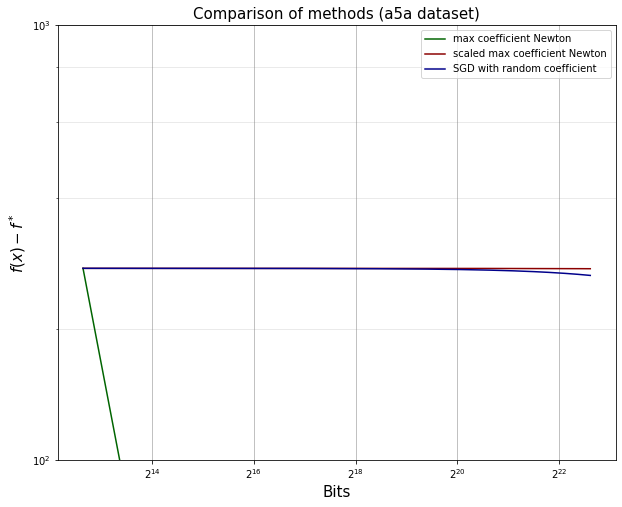

In [28]:
figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coefficient Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='scaled max coefficient Newton')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
plt.ylim([10**(2), 10**(3)])
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (a5a dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_bits_5.png')
plt.show()

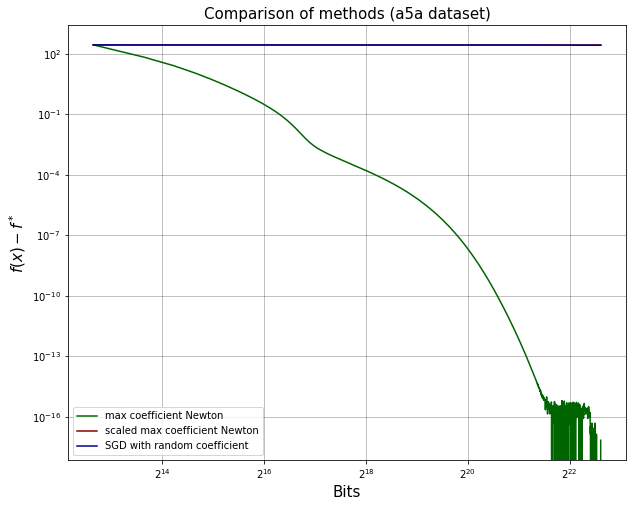

In [34]:
figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coefficient Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='scaled max coefficient Newton')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(2), 10**(3)])
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (a5a dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('a7a_dataset_bits_5.png')
plt.show()

# Artificial dataset

In [62]:
N = 16100  # of elements
n = 100
m = 161
d = 123 # of features
lmbd = 0.00001

b = np.random.uniform(-1, 1, (N,))
A = np.random.uniform(-1, 1, (N, d))

mu = 0.1      

## $f_i(x) = \frac{1}{12}\|a_i^Tx-b_i\|^4$
## $\alpha_i(x) = \|a_i^Tx-b_i\|^2$

In [63]:
def f(x): #compute the value of function f
    ans = 0
    for i in range(N):
        ans += 1/12*(A[i].dot(x)-b[i])**4/N
    ans += lmbd/2*np.linalg.norm(x)**2
    return ans

def Hessian(x, k, j): #computation of the Hessian of f_i in point x
    i = k*m+j
    alpha = (A[i].dot(x)-b[i])**2
    ans = lmbd*np.eye(d) + alpha*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
    return ans

def coef_computation(x, k, j):
    i = m*k + j
    alpha = (A[i].dot(x)-b[i])**2
    return alpha

def gradient(x, k, j): #computation of the gradient of f_i in point x
    i = m*k + j
    alpha = 1/3*(A[i].dot(x)-b[i])**3
    ans = lmbd*x+alpha*A[i]
    return ans


H = lmbd*np.eye(d)
x = np.ones(d)*100
for i in range(N):
    H += 1/N*(A[i].dot(x)-b[i])**2*A[i].reshape((d,1)).dot(A[i].reshape(1,d))

L = np.linalg.eig(H)[0].max().real
mu = np.linalg.eig(H)[0].min().real
print(mu, L)

100251.73127921968 409317.7594783483


In [65]:
x_star = y
f(x_star)

0.016610016465432555

In [66]:
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []
iterates_max = []
iterates_nm = []
iterates_gd = []
iterates_rand = []


bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
scaled_max_coef = []
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.ones(d)*0.5 # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


iterates_max.append(x)
iterates_nm.append(y)
iterates_rand.append(z)
iterates_gd.append(t)


for n_step in range(1000):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, 'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)

    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)
    iterates_max.append(x)
    
        

    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(x_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*coef_computation(x_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)



    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    iterates_nm.append(y)
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    iterates_rand.append(z)

    
    # GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global
    iterates_gd.append(t)

Scaled Max Coef: 27.804617580953398 MaxCoef 27.804617580953398 St. NM: 27.804617580953398 Rnd.GD 27.804617580953398 St.GD: 27.804617580953398
Scaled Max Coef: 27.80460915436822 MaxCoef 27.800835390627594 St. NM: 5.689857818378167 Rnd.GD 27.803964919335165 St.GD: 27.8036909128484
Scaled Max Coef: 27.80460072778864 MaxCoef 27.797053982783215 St. NM: 1.2115156124213478 Rnd.GD 27.80298465000914 St.GD: 27.802764291721946
Scaled Max Coef: 27.804592301215184 MaxCoef 27.79327335720318 St. NM: 0.27856376429375634 Rnd.GD 27.801746242762732 St.GD: 27.801837717570415
Scaled Max Coef: 27.804583874647115 MaxCoef 27.789493513671015 St. NM: 0.0737209955993918 Rnd.GD 27.801118899824512 St.GD: 27.800911190391055
Scaled Max Coef: 27.804575448084975 MaxCoef 27.785714451970076 St. NM: 0.02610955173529972 Rnd.GD 27.800574226536966 St.GD: 27.799984710180397
Scaled Max Coef: 27.804567021528694 MaxCoef 27.78193617188377 St. NM: 0.017019308419904157 Rnd.GD 27.79928754688164 St.GD: 27.79905827693526
Scaled Max C

Scaled Max Coef: 27.8041288485459 MaxCoef 27.586537326788903 St. NM: 0.016610016465432555 Rnd.GD 27.750255071662778 St.GD: 27.750948387764474
Scaled Max Coef: 27.80412042229504 MaxCoef 27.58280016436744 St. NM: 0.016610016465432555 Rnd.GD 27.749081684775614 St.GD: 27.75002443913935
Scaled Max Coef: 27.804111996050242 MaxCoef 27.579063771978042 St. NM: 0.016610016465432555 Rnd.GD 27.74819119586067 St.GD: 27.749100537308117
Scaled Max Coef: 27.8041035698111 MaxCoef 27.575328149408502 St. NM: 0.016610016465432555 Rnd.GD 27.74705312120989 St.GD: 27.74817668226732
Scaled Max Coef: 27.804095143577598 MaxCoef 27.57159329644598 St. NM: 0.016610016465432555 Rnd.GD 27.745754556278396 St.GD: 27.74725287401436
Scaled Max Coef: 27.804086717350025 MaxCoef 27.567859212878655 St. NM: 0.016610016465432555 Rnd.GD 27.744751554164992 St.GD: 27.74632911254546
Scaled Max Coef: 27.80407829112845 MaxCoef 27.564125898493877 St. NM: 0.016610016465432555 Rnd.GD 27.743439037195504 St.GD: 27.7454053978578
Scaled M

Scaled Max Coef: 27.80364013554012 MaxCoef 27.3710482448628 St. NM: 0.016610016465432555 Rnd.GD 27.69333676618816 St.GD: 27.697436619847487
Scaled Max Coef: 27.803631709623932 MaxCoef 27.36735539536497 St. NM: 0.016610016465432555 Rnd.GD 27.69216474385928 St.GD: 27.696515380024824
Scaled Max Coef: 27.803623283713573 MaxCoef 27.3636633036971 St. NM: 0.016610016465432555 Rnd.GD 27.69126266745829 St.GD: 27.69559418681247
Scaled Max Coef: 27.803614857808945 MaxCoef 27.35997196965127 St. NM: 0.016610016465432555 Rnd.GD 27.690054952580688 St.GD: 27.694673040206922
Scaled Max Coef: 27.803606431910147 MaxCoef 27.356281393019042 St. NM: 0.016610016465432555 Rnd.GD 27.68899984134332 St.GD: 27.693751940205466
Scaled Max Coef: 27.80359800601716 MaxCoef 27.3525915735923 St. NM: 0.016610016465432555 Rnd.GD 27.68752161623715 St.GD: 27.692830886804554
Scaled Max Coef: 27.80358958012968 MaxCoef 27.348902511162954 St. NM: 0.016610016465432555 Rnd.GD 27.68618145444356 St.GD: 27.691909880001386
Scaled Max

Scaled Max Coef: 27.80315144193541 MaxCoef 27.15810927160868 St. NM: 0.016610016465432555 Rnd.GD 27.639904303396232 St.GD: 27.644081659409217
Scaled Max Coef: 27.803143016353715 MaxCoef 27.15446003421755 St. NM: 0.016610016465432555 Rnd.GD 27.638930593570265 St.GD: 27.6431631177639
Scaled Max Coef: 27.803134590777677 MaxCoef 27.15081154269562 St. NM: 0.016610016465432555 Rnd.GD 27.637816103785273 St.GD: 27.64224462254652
Scaled Max Coef: 27.80312616520753 MaxCoef 27.147163796838793 St. NM: 0.016610016465432555 Rnd.GD 27.636369136872364 St.GD: 27.641326173753193
Scaled Max Coef: 27.803117739643266 MaxCoef 27.143516796443052 St. NM: 0.016610016465432555 Rnd.GD 27.63572133203328 St.GD: 27.640407771381092
Scaled Max Coef: 27.803109314084388 MaxCoef 27.139870541304408 St. NM: 0.016610016465432555 Rnd.GD 27.63474870698738 St.GD: 27.639489415426848
Scaled Max Coef: 27.803100888531493 MaxCoef 27.13622503121852 St. NM: 0.016610016465432555 Rnd.GD 27.63370307067501 St.GD: 27.63857110588743
Scale

Scaled Max Coef: 27.802662767729924 MaxCoef 26.947680155338375 St. NM: 0.016610016465432555 Rnd.GD 27.585614183015064 St.GD: 27.5908828916905
Scaled Max Coef: 27.80265434248286 MaxCoef 26.944073843065045 St. NM: 0.016610016465432555 Rnd.GD 27.584694481510788 St.GD: 27.589967037650116
Scaled Max Coef: 27.802645917241293 MaxCoef 26.94046826493566 St. NM: 0.016610016465432555 Rnd.GD 27.583646025335607 St.GD: 27.589051229855464
Scaled Max Coef: 27.802637492005754 MaxCoef 26.936863420749912 St. NM: 0.016610016465432555 Rnd.GD 27.582311538846888 St.GD: 27.588135468303136
Scaled Max Coef: 27.80262906677579 MaxCoef 26.93325931030794 St. NM: 0.016610016465432555 Rnd.GD 27.58177192159692 St.GD: 27.58721975299003
Scaled Max Coef: 27.802620641551613 MaxCoef 26.929655933409613 St. NM: 0.016610016465432555 Rnd.GD 27.581045536224213 St.GD: 27.586304083913316
Scaled Max Coef: 27.80261221633338 MaxCoef 26.926053289855073 St. NM: 0.016610016465432555 Rnd.GD 27.580129573373718 St.GD: 27.585388461069947
S

Scaled Max Coef: 27.80217411292332 MaxCoef 26.739721437035403 St. NM: 0.016610016465432555 Rnd.GD 27.531836470253914 St.GD: 27.537839704948425
Scaled Max Coef: 27.802165688010685 MaxCoef 26.736157376392104 St. NM: 0.016610016465432555 Rnd.GD 27.530680461876397 St.GD: 27.53692652799159
Scaled Max Coef: 27.802157263103545 MaxCoef 26.732594038397334 St. NM: 0.016610016465432555 Rnd.GD 27.529527723980355 St.GD: 27.536013397099758
Scaled Max Coef: 27.802148838202385 MaxCoef 26.72903142285479 St. NM: 0.016610016465432555 Rnd.GD 27.528516062671525 St.GD: 27.53510031226945
Scaled Max Coef: 27.802140413306937 MaxCoef 26.72546952956882 St. NM: 0.016610016465432555 Rnd.GD 27.52796024906754 St.GD: 27.53418727349728
Scaled Max Coef: 27.80213198841719 MaxCoef 26.721908358342876 St. NM: 0.016610016465432555 Rnd.GD 27.527476369584086 St.GD: 27.533274280780734
Scaled Max Coef: 27.80212356353329 MaxCoef 26.71834790898091 St. NM: 0.016610016465432555 Rnd.GD 27.52633408681039 St.GD: 27.532361334116466
Sca

Scaled Max Coef: 27.801685477514003 MaxCoef 26.534194431682415 St. NM: 0.016610016465432555 Rnd.GD 27.484208645632865 St.GD: 27.48495149043771
Scaled Max Coef: 27.801677052935762 MaxCoef 26.530671962365965 St. NM: 0.016610016465432555 Rnd.GD 27.483281717264052 St.GD: 27.484040980095564
Scaled Max Coef: 27.80166862836313 MaxCoef 26.527150204427112 St. NM: 0.016610016465432555 Rnd.GD 27.482441998310385 St.GD: 27.483130515638013
Scaled Max Coef: 27.80166020379633 MaxCoef 26.523629157674012 St. NM: 0.016610016465432555 Rnd.GD 27.481827849271138 St.GD: 27.482220097061774
Scaled Max Coef: 27.80165177923522 MaxCoef 26.520108821913727 St. NM: 0.016610016465432555 Rnd.GD 27.480710721333455 St.GD: 27.48130972436397
Scaled Max Coef: 27.80164335467994 MaxCoef 26.51658919695441 St. NM: 0.016610016465432555 Rnd.GD 27.479589703024672 St.GD: 27.48039939754165
Scaled Max Coef: 27.80163493013046 MaxCoef 26.51307028260387 St. NM: 0.016610016465432555 Rnd.GD 27.477975363815595 St.GD: 27.479489116591385
Sc

Scaled Max Coef: 27.801196861501033 MaxCoef 26.331061210092034 St. NM: 0.016610016465432555 Rnd.GD 27.43068567053598 St.GD: 27.4322176423949
Scaled Max Coef: 27.801188437257 MaxCoef 26.32757968467401 St. NM: 0.016610016465432555 Rnd.GD 27.429717964725718 St.GD: 27.43130978824883
Scaled Max Coef: 27.801180013018925 MaxCoef 26.32409885958189 St. NM: 0.016610016465432555 Rnd.GD 27.429025269274867 St.GD: 27.430401979808234
Scaled Max Coef: 27.80117158878636 MaxCoef 26.320618734627548 St. NM: 0.016610016465432555 Rnd.GD 27.42837258169995 St.GD: 27.429494217069916
Scaled Max Coef: 27.80116316455982 MaxCoef 26.31713930962255 St. NM: 0.016610016465432555 Rnd.GD 27.427613114719914 St.GD: 27.42858650003089
Scaled Max Coef: 27.801154740338998 MaxCoef 26.313660584377924 St. NM: 0.016610016465432555 Rnd.GD 27.426834189027808 St.GD: 27.427678828688247
Scaled Max Coef: 27.80114631612386 MaxCoef 26.31018255870557 St. NM: 0.016610016465432555 Rnd.GD 27.426084161285655 St.GD: 27.426771203038296
Scaled M

Scaled Max Coef: 27.800708264882946 MaxCoef 26.130284581207253 St. NM: 0.016610016465432555 Rnd.GD 27.376852307624873 St.GD: 27.379637558018555
Scaled Max Coef: 27.800699840973262 MaxCoef 26.12684336483303 St. NM: 0.016610016465432555 Rnd.GD 27.37581342268559 St.GD: 27.378732349701608
Scaled Max Coef: 27.800691417069487 MaxCoef 26.123402837947914 St. NM: 0.016610016465432555 Rnd.GD 27.374650629113116 St.GD: 27.37782718691158
Scaled Max Coef: 27.80068299317144 MaxCoef 26.11996300036688 St. NM: 0.016610016465432555 Rnd.GD 27.373667890082316 St.GD: 27.376922069645488
Scaled Max Coef: 27.800674569279455 MaxCoef 26.116523851905196 St. NM: 0.016610016465432555 Rnd.GD 27.372375607765136 St.GD: 27.376016997900532
Scaled Max Coef: 27.800666145392864 MaxCoef 26.11308539237766 St. NM: 0.016610016465432555 Rnd.GD 27.371297756433904 St.GD: 27.37511197167354
Scaled Max Coef: 27.80065772151213 MaxCoef 26.10964762159965 St. NM: 0.016610016465432555 Rnd.GD 27.370560993883174 St.GD: 27.37420699096127
Sc

Scaled Max Coef: 27.800219687658853 MaxCoef 25.93182807492794 St. NM: 0.016610016465432555 Rnd.GD 27.320435780251096 St.GD: 27.327210637453813
Scaled Max Coef: 27.800211264083718 MaxCoef 25.92842654502591 St. NM: 0.016610016465432555 Rnd.GD 27.319514143328174 St.GD: 27.32630806464918
Scaled Max Coef: 27.800202840514235 MaxCoef 25.925025693985 St. NM: 0.016610016465432555 Rnd.GD 27.31863540608116 St.GD: 27.32540553719395
Scaled Max Coef: 27.800194416950514 MaxCoef 25.92162552162386 St. NM: 0.016610016465432555 Rnd.GD 27.31751268696761 St.GD: 27.324503055085504
Scaled Max Coef: 27.80018599339264 MaxCoef 25.918226027761037 St. NM: 0.016610016465432555 Rnd.GD 27.316906211521264 St.GD: 27.32360061832059
Scaled Max Coef: 27.800177569840624 MaxCoef 25.914827212215396 St. NM: 0.016610016465432555 Rnd.GD 27.31616887101077 St.GD: 27.322698226896428
Scaled Max Coef: 27.800169146294095 MaxCoef 25.91142907480534 St. NM: 0.016610016465432555 Rnd.GD 27.31545466285111 St.GD: 27.321795880809645
Scaled 

Scaled Max Coef: 27.79973112982751 MaxCoef 25.735655925385952 St. NM: 0.016610016465432555 Rnd.GD 27.265492067188816 St.GD: 27.27493628377391
Scaled Max Coef: 27.79972270658676 MaxCoef 25.73229347138222 St. NM: 0.016610016465432555 Rnd.GD 27.2647736126719 St.GD: 27.274036336215236
Scaled Max Coef: 27.799714283351456 MaxCoef 25.72893168581622 St. NM: 0.016610016465432555 Rnd.GD 27.264068008253016 St.GD: 27.27313643382956
Scaled Max Coef: 27.79970586012218 MaxCoef 25.725570568509895 St. NM: 0.016610016465432555 Rnd.GD 27.263180836306752 St.GD: 27.272236576614183
Scaled Max Coef: 27.799697436898715 MaxCoef 25.722210119285254 St. NM: 0.016610016465432555 Rnd.GD 27.262248199204222 St.GD: 27.27133676456576
Scaled Max Coef: 27.79968901368106 MaxCoef 25.718850337964312 St. NM: 0.016610016465432555 Rnd.GD 27.26120159199139 St.GD: 27.27043699768127
Scaled Max Coef: 27.79968059046897 MaxCoef 25.71549122436997 St. NM: 0.016610016465432555 Rnd.GD 27.26004513934402 St.GD: 27.269537275957834
Scaled M

Scaled Max Coef: 27.799242591387948 MaxCoef 25.541733054670342 St. NM: 0.016610016465432555 Rnd.GD 27.21153257471101 St.GD: 27.222813902963406
Scaled Max Coef: 27.79923416848133 MaxCoef 25.538409077712355 St. NM: 0.016610016465432555 Rnd.GD 27.21069516734007 St.GD: 27.221916570434583
Scaled Max Coef: 27.79922574558071 MaxCoef 25.53508575896823 St. NM: 0.016610016465432555 Rnd.GD 27.21011003672272 St.GD: 27.22101928290324
Scaled Max Coef: 27.79921732268575 MaxCoef 25.531763098263074 St. NM: 0.016610016465432555 Rnd.GD 27.20956504062745 St.GD: 27.22012204036611
Scaled Max Coef: 27.799208899796465 MaxCoef 25.528441095422714 St. NM: 0.016610016465432555 Rnd.GD 27.208066345617805 St.GD: 27.219224842820545
Scaled Max Coef: 27.799200476912798 MaxCoef 25.525119750272594 St. NM: 0.016610016465432555 Rnd.GD 27.207353204894194 St.GD: 27.218327690263127
Scaled Max Coef: 27.799192054035146 MaxCoef 25.52179906263843 St. NM: 0.016610016465432555 Rnd.GD 27.20627758471575 St.GD: 27.21743058269138
Scale

Scaled Max Coef: 27.798754072338756 MaxCoef 25.35002505698918 St. NM: 0.016610016465432555 Rnd.GD 27.162698749308724 St.GD: 27.17084290390133
Scaled Max Coef: 27.79874564976682 MaxCoef 25.346738969676302 St. NM: 0.016610016465432555 Rnd.GD 27.1615957938989 St.GD: 27.16994817623579
Scaled Max Coef: 27.79873722720014 MaxCoef 25.343453530548242 St. NM: 0.016610016465432555 Rnd.GD 27.160520627208353 St.GD: 27.169053493393008
Scaled Max Coef: 27.798728804639538 MaxCoef 25.340168739434027 St. NM: 0.016610016465432555 Rnd.GD 27.159473120464316 St.GD: 27.16815885536956
Scaled Max Coef: 27.79872038208455 MaxCoef 25.33688459616235 St. NM: 0.016610016465432555 Rnd.GD 27.15888935941972 St.GD: 27.16726426216283
Scaled Max Coef: 27.79871195953549 MaxCoef 25.333601100562447 St. NM: 0.016610016465432555 Rnd.GD 27.15793191693758 St.GD: 27.166369713769885
Scaled Max Coef: 27.798703536992132 MaxCoef 25.330318252462817 St. NM: 0.016610016465432555 Rnd.GD 27.15732093221102 St.GD: 27.165475210187086
Scaled 

Scaled Max Coef: 27.798265572678975 MaxCoef 25.160498183257662 St. NM: 0.016610016465432555 Rnd.GD 27.110270807077274 St.GD: 27.119022698343812
Scaled Max Coef: 27.79825715044123 MaxCoef 25.157249409378792 St. NM: 0.016610016465432555 Rnd.GD 27.109488041887193 St.GD: 27.11813056542477
Scaled Max Coef: 27.798248728209032 MaxCoef 25.15400127384693 St. NM: 0.016610016465432555 Rnd.GD 27.10819694842855 St.GD: 27.11723847715433
Scaled Max Coef: 27.798240305982553 MaxCoef 25.150753776493616 St. NM: 0.016610016465432555 Rnd.GD 27.107390457823005 St.GD: 27.116346433529404
Scaled Max Coef: 27.798231883762046 MaxCoef 25.147506917151716 St. NM: 0.016610016465432555 Rnd.GD 27.10637836233751 St.GD: 27.11545443454735
Scaled Max Coef: 27.79822346154721 MaxCoef 25.144260695652825 St. NM: 0.016610016465432555 Rnd.GD 27.105844415165507 St.GD: 27.114562480204476
Scaled Max Coef: 27.79821503933813 MaxCoef 25.141015111829145 St. NM: 0.016610016465432555 Rnd.GD 27.10511066095778 St.GD: 27.1136705704984
Scal

Scaled Max Coef: 27.797777092407618 MaxCoef 24.97311932609461 St. NM: 0.016610016465432555 Rnd.GD 27.05680740951029 St.GD: 27.06735270090785
Scaled Max Coef: 27.797768670504073 MaxCoef 24.969907300373507 St. NM: 0.016610016465432555 Rnd.GD 27.05573493286556 St.GD: 27.066463152667712
Scaled Max Coef: 27.797760248606053 MaxCoef 24.966695903347436 St. NM: 0.016610016465432555 Rnd.GD 27.055302747974604 St.GD: 27.065573648902486
Scaled Max Coef: 27.79775182671402 MaxCoef 24.963485134851737 St. NM: 0.016610016465432555 Rnd.GD 27.054494478900523 St.GD: 27.06468418960981
Scaled Max Coef: 27.797743404827784 MaxCoef 24.960274994721715 St. NM: 0.016610016465432555 Rnd.GD 27.053359492294298 St.GD: 27.063794774786825
Scaled Max Coef: 27.797734982947183 MaxCoef 24.95706548279298 St. NM: 0.016610016465432555 Rnd.GD 27.052075075835084 St.GD: 27.062905404430172
Scaled Max Coef: 27.79772656107214 MaxCoef 24.95385659890024 St. NM: 0.016610016465432555 Rnd.GD 27.05151090652154 St.GD: 27.062016078537084
Sc

Scaled Max Coef: 27.797288631523184 MaxCoef 24.78785600522014 St. NM: 0.016610016465432555 Rnd.GD 27.007815920184022 St.GD: 27.01583232905436
Scaled Max Coef: 27.797280209953865 MaxCoef 24.784680173066455 St. NM: 0.016610016465432555 Rnd.GD 27.007007199675893 St.GD: 27.014945355473586
Scaled Max Coef: 27.79727178839037 MaxCoef 24.781504960138598 St. NM: 0.016610016465432555 Rnd.GD 27.005747232282733 St.GD: 27.014058426195795
Scaled Max Coef: 27.79726336683255 MaxCoef 24.77833036627476 St. NM: 0.016610016465432555 Rnd.GD 27.005113603114026 St.GD: 27.01317154121815
Scaled Max Coef: 27.797254945280375 MaxCoef 24.77515639131293 St. NM: 0.016610016465432555 Rnd.GD 27.00383187895604 St.GD: 27.012284700537936
Scaled Max Coef: 27.79724652373389 MaxCoef 24.771983035091655 St. NM: 0.016610016465432555 Rnd.GD 27.003064879588244 St.GD: 27.01139790415189
Scaled Max Coef: 27.797238102193358 MaxCoef 24.768810297449747 St. NM: 0.016610016465432555 Rnd.GD 27.002269756268 St.GD: 27.010511152056953
Scale

Scaled Max Coef: 27.796800190024875 MaxCoef 24.604676353237352 St. NM: 0.016610016465432555 Rnd.GD 26.953951949289703 St.GD: 26.964461003070884
Scaled Max Coef: 27.79679176878977 MaxCoef 24.601536170506193 St. NM: 0.016610016465432555 Rnd.GD 26.9531609543326 St.GD: 26.963576594179447
Scaled Max Coef: 27.796783347560297 MaxCoef 24.598396597708913 St. NM: 0.016610016465432555 Rnd.GD 26.95204147856185 St.GD: 26.96269222941956
Scaled Max Coef: 27.796774926336795 MaxCoef 24.595257634686988 St. NM: 0.016610016465432555 Rnd.GD 26.950982714887548 St.GD: 26.961807908788394
Scaled Max Coef: 27.796766505118846 MaxCoef 24.592119281281782 St. NM: 0.016610016465432555 Rnd.GD 26.95010565977782 St.GD: 26.9609236322827
Scaled Max Coef: 27.796758083906745 MaxCoef 24.588981537334657 St. NM: 0.016610016465432555 Rnd.GD 26.94914553190869 St.GD: 26.960039399900154
Scaled Max Coef: 27.79674966270039 MaxCoef 24.585844402687318 St. NM: 0.016610016465432555 Rnd.GD 26.948522289572775 St.GD: 26.95915521163728
Sca

Scaled Max Coef: 27.79631176791124 MaxCoef 24.42354910179184 St. NM: 0.016610016465432555 Rnd.GD 26.904306499277006 St.GD: 26.913238146056386
Scaled Max Coef: 27.796303347010323 MaxCoef 24.420444034546414 St. NM: 0.016610016465432555 Rnd.GD 26.90354520521542 St.GD: 26.912356291932223
Scaled Max Coef: 27.79629492611518 MaxCoef 24.417339568117757 St. NM: 0.016610016465432555 Rnd.GD 26.902902338499143 St.GD: 26.911474481768998
Scaled Max Coef: 27.796286505225595 MaxCoef 24.414235702349327 St. NM: 0.016610016465432555 Rnd.GD 26.90225769901888 St.GD: 26.910592715563855
Scaled Max Coef: 27.796278084342074 MaxCoef 24.411132437086035 St. NM: 0.016610016465432555 Rnd.GD 26.901833589161615 St.GD: 26.909710993313634
Scaled Max Coef: 27.79626966346415 MaxCoef 24.40802977217219 St. NM: 0.016610016465432555 Rnd.GD 26.90096324100611 St.GD: 26.908829315015854
Scaled Max Coef: 27.79626124259203 MaxCoef 24.404927707452128 St. NM: 0.016610016465432555 Rnd.GD 26.90040088122645 St.GD: 26.90794768066711
Sca

In [67]:
f_optimal = stand_nm[-1]
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal
max_coef_scaled = np.array(max_coef_scaled) - f_optimal

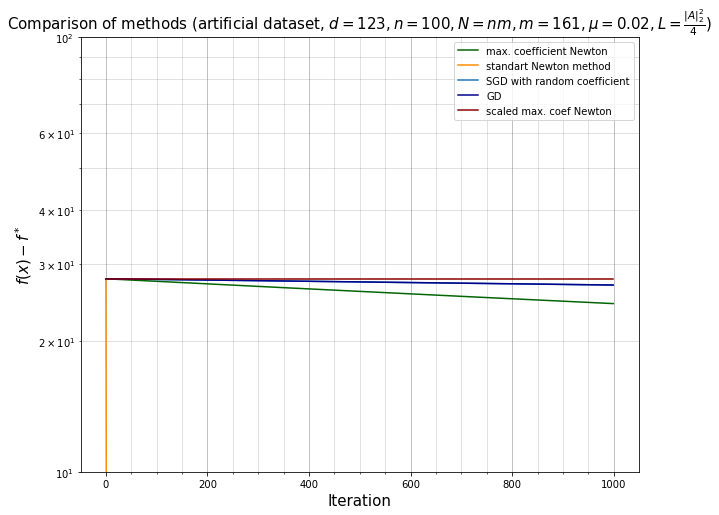

In [68]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd,
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD', color='darkblue')
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled, color='darkred', label='scaled max. coef Newton')

#plt.xlim([-0.01, 1.0])
plt.ylim([10**(1), 10**(2)])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (artificial dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{\|A\|^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.3)
plt.savefig('artificial_dataset1.png')
plt.show()

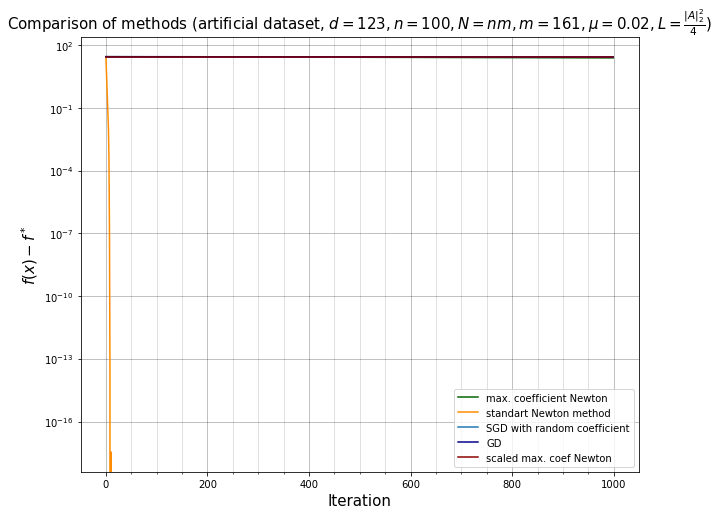

In [69]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd,
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD', color='darkblue')
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled, color='darkred', label='scaled max. coef Newton')

#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(-4), 10**(3)])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (artificial dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{\|A\|^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.3)
plt.savefig('artificial_dataset2.png')
plt.show()

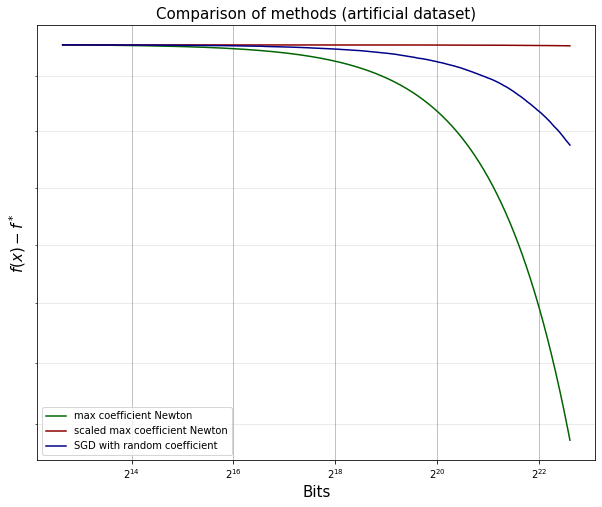

In [70]:
figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coefficient Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='scaled max coefficient Newton')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(2), 10**(3)])
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (artificial dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('artificial_dataset_bits1.png')
plt.show()

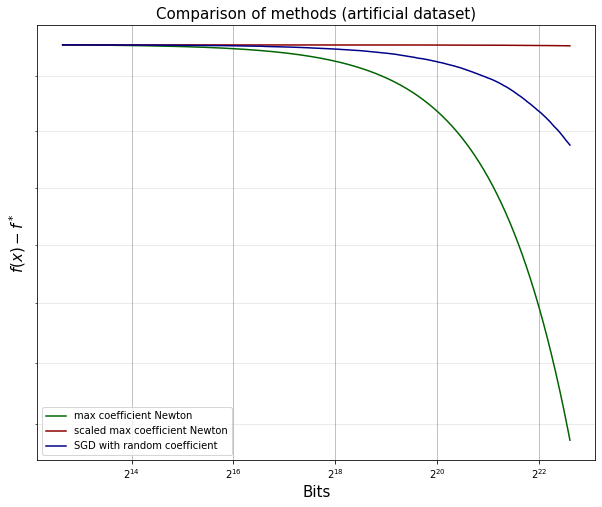

In [71]:
figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coefficient Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='scaled max coefficient Newton')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(2), 10**(3)])
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (artificial dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('artificial_dataset_bits2.png')
plt.show()

## Logisitc regression

In [79]:
N = 16100  # of elements
n = 100
m = 161
d = 123 # of features
lmbd = 0.00001

b = np.random.uniform(-0.1, 0.1, (N,))
A = np.random.uniform(-0.1, 0.1, (N, d))

mu = 0.1      

In [80]:
def f(x): #compute the value of function f
    ans = 0
    for i in range(N):
        ans += math.log(1+math.exp(-b[i]*A[i].dot(x)))/N
    ans += lmbd/2*np.linalg.norm(x)**2
    return ans

def Hessian(x, k, j): #computation of the Hessian of f_i in point x
    i = k*m+j
    alpha = b[i]**2*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))**2
    ans = lmbd*np.eye(d) + alpha*A[i].reshape((d,1)).dot(A[i].reshape(1,d))
    return ans

def coef_computation(x, k, j):
    i = m*k + j
    alpha = b[i]**2*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))**2
    return alpha

def gradient(x, k, j): #computation of the gradient of f_i in point x
    i = m*k + j
    alpha = -b[i]*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))
    ans = lmbd*x+alpha*A[i]
    return ans

def coef_comp(x, k, j):
    i = m*k + j
    alpha = -b[i]*math.exp(-b[i]*A[i].dot(x))/(1+math.exp(-b[i]*A[i].dot(x)))
    return alpha

In [87]:
x_star = y
f(x_star)

0.692283374233233

In [88]:
max_coef_newton = [] # function value at iterates of compressed newton method
rand_gd = []
stand_nm = [] # function value at iterates of standard newton method
stand_gd = []
max_coef_scaled = []
iterates_max = []
iterates_nm = []
iterates_gd = []
iterates_rand = []


bits_max_coef = [] # number of transferred bits
bits_rand_gd = [] # number of transferred bits   
scaled_max_coef = []
cur_bits_max_coef = 0
cur_bits_rand_gd = 0
cur_bits_scaled = 0

x = np.ones(d)*100 # iterates of CNM
y = x # iterates of Stand.NM
z = x
t = x
q=x


iterates_max.append(x)
iterates_nm.append(y)
iterates_rand.append(z)
iterates_gd.append(t)


for n_step in range(1000):
    value = f(q)
    value_max_coef = f(x)
    value_stand_nm = f(y) 
    value_rand_gd = f(z)
    value_stand_gd = f(t)
    print('Scaled Max Coef:', value, 'MaxCoef', value_max_coef, 'St. NM:', value_stand_nm, 'Rnd.GD', value_rand_gd, 'St.GD:', value_stand_gd)

    # step of CNM with sparsification
    max_coef_newton.append(value_max_coef)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(x, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(x, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_max_coef += 64*n
    x = x - np.linalg.inv(B).dot(g)
    bits_max_coef.append(cur_bits_max_coef)
    iterates_max.append(x)
    
        

    max_coef_scaled.append(value)
    B = np.zeros((d,d))
    g = np.zeros(d)
    ans = 0
    for k in range(n):
        max_coef = 0
        for j in range(m):
            current_coef = coef_computation(q, k, j)/coef_computation(x_star, k, j)
            if current_coef > max_coef:
                max_coef = current_coef
            g += gradient(q, k, j)/N
        for j in range(m):
            i = m*k+j
            a = A[i]
            B += max_coef*coef_computation(x_star, k, j)*a.reshape((d,1)).dot(a.reshape((1,d)))/N
    B += mu*np.eye(d)
    cur_bits_scaled += 64*n
    q = q - np.linalg.inv(B).dot(g)
    scaled_max_coef.append(cur_bits_scaled)



    # step of Stand.NM
    stand_nm.append(value_stand_nm)
    true_hessian = np.zeros((d,d))
    g = np.zeros(d)
    for k in range(n):
        for j in range(m):
            true_hessian += Hessian(y, k, j)/N
            g += gradient(y, k, j)/N
    y = y - np.linalg.inv(true_hessian).dot(g) 
    iterates_nm.append(y)
    
    # CGD
    rand_gd.append(value_rand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        j = np.random.choice(m)
        g_global += gradient(z, k, j)/n
    cur_bits_rand_gd += 64*n
    bits_rand_gd.append(cur_bits_rand_gd)
    z = z - 1/L*g_global
    iterates_rand.append(z)

    
    # GD
    stand_gd.append(value_stand_gd)
    g_global = np.zeros(d)
    for k in range(n):
        for j in range(m):
            g_global += gradient(t, k, j)/N
    t = t - 1/L*g_global
    iterates_gd.append(t)

Scaled Max Coef: 7.649641493139783 MaxCoef 7.649641493139783 St. NM: 7.649641493139783 Rnd.GD 7.649641493139783 St.GD: 7.649641493139783
Scaled Max Coef: 7.6481789917499325 MaxCoef 7.648179056389279 St. NM: 0.7362395656702002 Rnd.GD 7.64964149278575 St.GD: 7.649641492782454
Scaled Max Coef: 7.646716787477109 MaxCoef 7.646716916730785 St. NM: 0.6922907449258436 Rnd.GD 7.649641492426848 St.GD: 7.649641492425134
Scaled Max Coef: 7.645254880262024 MaxCoef 7.645255074104988 St. NM: 0.6922833742332354 Rnd.GD 7.649641492057645 St.GD: 7.649641492067803
Scaled Max Coef: 7.643793270045372 MaxCoef 7.64379352845261 St. NM: 0.692283374233233 Rnd.GD 7.649641491701622 St.GD: 7.649641491710476
Scaled Max Coef: 7.642331956767881 MaxCoef 7.642332279714411 St. NM: 0.692283374233233 Rnd.GD 7.6496414913456094 St.GD: 7.649641491353133
Scaled Max Coef: 7.640870940370297 MaxCoef 7.640871327831096 St. NM: 0.692283374233233 Rnd.GD 7.649641490995027 St.GD: 7.649641490995811
Scaled Max Coef: 7.6394102207933745 Ma

Scaled Max Coef: 7.562415283419465 MaxCoef 7.562419117726851 St. NM: 0.692283374233233 Rnd.GD 7.649641471662756 St.GD: 7.6496414716999865
Scaled Max Coef: 7.5609705044950815 MaxCoef 7.560974401953166 St. NM: 0.692283374233233 Rnd.GD 7.649641471302906 St.GD: 7.649641471342651
Scaled Max Coef: 7.559526019150625 MaxCoef 7.559529979734819 St. NM: 0.692283374233233 Rnd.GD 7.649641470945475 St.GD: 7.649641470985313
Scaled Max Coef: 7.55808182732752 MaxCoef 7.558085851013236 St. NM: 0.692283374233233 Rnd.GD 7.649641470590851 St.GD: 7.649641470627991
Scaled Max Coef: 7.5566379289671355 MaxCoef 7.556642015729833 St. NM: 0.692283374233233 Rnd.GD 7.649641470231711 St.GD: 7.649641470270667
Scaled Max Coef: 7.555194324010948 MaxCoef 7.55519847382606 St. NM: 0.692283374233233 Rnd.GD 7.649641469874576 St.GD: 7.649641469913323
Scaled Max Coef: 7.553751012400367 MaxCoef 7.553755225243346 St. NM: 0.692283374233233 Rnd.GD 7.649641469510198 St.GD: 7.649641469555998
Scaled Max Coef: 7.5523079940768785 MaxC

Scaled Max Coef: 7.476246185042857 MaxCoef 7.476253765117171 St. NM: 0.692283374233233 Rnd.GD 7.64964145013901 St.GD: 7.649641450260178
Scaled Max Coef: 7.47481891760241 MaxCoef 7.474826559364586 St. NM: 0.692283374233233 Rnd.GD 7.649641449786743 St.GD: 7.649641449902843
Scaled Max Coef: 7.473391940246883 MaxCoef 7.473399643672732 St. NM: 0.692283374233233 Rnd.GD 7.649641449438665 St.GD: 7.649641449545505
Scaled Max Coef: 7.471965252918414 MaxCoef 7.4719730179837756 St. NM: 0.692283374233233 Rnd.GD 7.649641449076658 St.GD: 7.649641449188172
Scaled Max Coef: 7.470538855559075 MaxCoef 7.4705466822397835 St. NM: 0.692283374233233 Rnd.GD 7.649641448715262 St.GD: 7.649641448830847
Scaled Max Coef: 7.4691127481110104 MaxCoef 7.469120636382903 St. NM: 0.692283374233233 Rnd.GD 7.649641448361187 St.GD: 7.649641448473522
Scaled Max Coef: 7.467686930516375 MaxCoef 7.467694880355294 St. NM: 0.692283374233233 Rnd.GD 7.649641448003909 St.GD: 7.649641448116194
Scaled Max Coef: 7.466261402717288 MaxCo

Scaled Max Coef: 7.391121613355815 MaxCoef 7.3911328521368365 St. NM: 0.692283374233233 Rnd.GD 7.649641428683752 St.GD: 7.649641428820373
Scaled Max Coef: 7.389711648929187 MaxCoef 7.38972294795924 St. NM: 0.692283374233233 Rnd.GD 7.64964142831426 St.GD: 7.6496414284630525
Scaled Max Coef: 7.388301971134085 MaxCoef 7.388313330389393 St. NM: 0.692283374233233 Rnd.GD 7.64964142795538 St.GD: 7.649641428105701
Scaled Max Coef: 7.3868925799133205 MaxCoef 7.386903999370114 St. NM: 0.692283374233233 Rnd.GD 7.649641427608294 St.GD: 7.649641427748369
Scaled Max Coef: 7.38548347520969 MaxCoef 7.385494954844196 St. NM: 0.692283374233233 Rnd.GD 7.649641427258045 St.GD: 7.6496414273910425
Scaled Max Coef: 7.384074656965993 MaxCoef 7.384086196754449 St. NM: 0.692283374233233 Rnd.GD 7.649641426895231 St.GD: 7.649641427033708
Scaled Max Coef: 7.382666125125068 MaxCoef 7.382677725043736 St. NM: 0.692283374233233 Rnd.GD 7.649641426533147 St.GD: 7.649641426676399
Scaled Max Coef: 7.381257879629763 MaxCoe

Scaled Max Coef: 7.307029133501218 MaxCoef 7.307043945359961 St. NM: 0.692283374233233 Rnd.GD 7.649641407262846 St.GD: 7.649641407380558
Scaled Max Coef: 7.30563626609968 MaxCoef 7.3056511367923065 St. NM: 0.692283374233233 Rnd.GD 7.649641406908148 St.GD: 7.64964140702323
Scaled Max Coef: 7.304243681917368 MaxCoef 7.304258611420522 St. NM: 0.692283374233233 Rnd.GD 7.649641406551632 St.GD: 7.649641406665892
Scaled Max Coef: 7.302851380897785 MaxCoef 7.302866369188067 St. NM: 0.692283374233233 Rnd.GD 7.649641406198947 St.GD: 7.649641406308575
Scaled Max Coef: 7.301459362984391 MaxCoef 7.3014744100384155 St. NM: 0.692283374233233 Rnd.GD 7.649641405840578 St.GD: 7.649641405951234
Scaled Max Coef: 7.300067628120697 MaxCoef 7.300082733915104 St. NM: 0.692283374233233 Rnd.GD 7.64964140548751 St.GD: 7.649641405593908
Scaled Max Coef: 7.298676176250208 MaxCoef 7.298691340761642 St. NM: 0.692283374233233 Rnd.GD 7.649641405122641 St.GD: 7.649641405236578
Scaled Max Coef: 7.297285007316448 MaxCoef

Scaled Max Coef: 7.223956458627708 MaxCoef 7.223974759346788 St. NM: 0.692283374233233 Rnd.GD 7.64964138587948 St.GD: 7.649641385940754
Scaled Max Coef: 7.222580484714213 MaxCoef 7.222598842875414 St. NM: 0.692283374233233 Rnd.GD 7.649641385507798 St.GD: 7.649641385583422
Scaled Max Coef: 7.221204790648287 MaxCoef 7.221223206228608 St. NM: 0.692283374233233 Rnd.GD 7.649641385150521 St.GD: 7.649641385226089
Scaled Max Coef: 7.219829376374076 MaxCoef 7.219847849350515 St. NM: 0.692283374233233 Rnd.GD 7.649641384797959 St.GD: 7.649641384868765
Scaled Max Coef: 7.21845424183571 MaxCoef 7.218472772185303 St. NM: 0.692283374233233 Rnd.GD 7.6496413844285085 St.GD: 7.649641384511428
Scaled Max Coef: 7.217079386977379 MaxCoef 7.217097974677128 St. NM: 0.692283374233233 Rnd.GD 7.649641384070243 St.GD: 7.649641384154101
Scaled Max Coef: 7.215704811743275 MaxCoef 7.2157234567702 St. NM: 0.692283374233233 Rnd.GD 7.649641383715465 St.GD: 7.649641383796778
Scaled Max Coef: 7.214330516077567 MaxCoef 7

Scaled Max Coef: 7.14189144811961 MaxCoef 7.141913154873891 St. NM: 0.692283374233233 Rnd.GD 7.6496413644802965 St.GD: 7.649641364500931
Scaled Max Coef: 7.140532166579527 MaxCoef 7.1405539294072105 St. NM: 0.692283374233233 Rnd.GD 7.6496413641203205 St.GD: 7.649641364143617
Scaled Max Coef: 7.13917316155546 MaxCoef 7.139194980433901 St. NM: 0.692283374233233 Rnd.GD 7.6496413637639975 St.GD: 7.649641363786283
Scaled Max Coef: 7.13781443299221 MaxCoef 7.137836307898805 St. NM: 0.692283374233233 Rnd.GD 7.64964136341376 St.GD: 7.649641363428954
Scaled Max Coef: 7.136455980834597 MaxCoef 7.136477911746736 St. NM: 0.692283374233233 Rnd.GD 7.6496413630498825 St.GD: 7.649641363071627
Scaled Max Coef: 7.135097805027462 MaxCoef 7.135119791922553 St. NM: 0.692283374233233 Rnd.GD 7.649641362693403 St.GD: 7.649641362714292
Scaled Max Coef: 7.133739905515633 MaxCoef 7.133761948371091 St. NM: 0.692283374233233 Rnd.GD 7.649641362334469 St.GD: 7.64964136235697
Scaled Max Coef: 7.1323822822439915 MaxCo

Scaled Max Coef: 7.060822105848232 MaxCoef 7.060847137185431 St. NM: 0.692283374233233 Rnd.GD 7.649641343078859 St.GD: 7.649641343061132
Scaled Max Coef: 7.059479317960338 MaxCoef 7.059504404024909 St. NM: 0.692283374233233 Rnd.GD 7.649641342718478 St.GD: 7.649641342703806
Scaled Max Coef: 7.0581368032965575 MaxCoef 7.05816194406625 St. NM: 0.692283374233233 Rnd.GD 7.649641342362141 St.GD: 7.649641342346479
Scaled Max Coef: 7.056794561802331 MaxCoef 7.056819757254914 St. NM: 0.692283374233233 Rnd.GD 7.649641342015212 St.GD: 7.649641341989144
Scaled Max Coef: 7.055452593423162 MaxCoef 7.055477843536402 St. NM: 0.692283374233233 Rnd.GD 7.649641341658127 St.GD: 7.649641341631819
Scaled Max Coef: 7.0541108981045255 MaxCoef 7.054136202856214 St. NM: 0.692283374233233 Rnd.GD 7.649641341297545 St.GD: 7.649641341274487
Scaled Max Coef: 7.052769475791928 MaxCoef 7.052794835159828 St. NM: 0.692283374233233 Rnd.GD 7.649641340939859 St.GD: 7.649641340917157
Scaled Max Coef: 7.051428326430893 MaxCo

Scaled Max Coef: 6.9807365784435955 MaxCoef 6.980764854265224 St. NM: 0.692283374233233 Rnd.GD 7.64964132168518 St.GD: 7.649641321621331
Scaled Max Coef: 6.979410087851452 MaxCoef 6.979438417076862 St. NM: 0.692283374233233 Rnd.GD 7.649641321332109 St.GD: 7.649641321264006
Scaled Max Coef: 6.978083867230672 MaxCoef 6.978112249837972 St. NM: 0.692283374233233 Rnd.GD 7.649641320969821 St.GD: 7.649641320906679
Scaled Max Coef: 6.976757916527401 MaxCoef 6.976786352494697 St. NM: 0.692283374233233 Rnd.GD 7.649641320609497 St.GD: 7.649641320549338
Scaled Max Coef: 6.975432235687707 MaxCoef 6.9754607249931935 St. NM: 0.692283374233233 Rnd.GD 7.64964132025281 St.GD: 7.649641320192001
Scaled Max Coef: 6.974106824657782 MaxCoef 6.974135367279576 St. NM: 0.692283374233233 Rnd.GD 7.64964131989449 St.GD: 7.649641319834679
Scaled Max Coef: 6.972781683383755 MaxCoef 6.972810279299999 St. NM: 0.692283374233233 Rnd.GD 7.649641319533313 St.GD: 7.649641319477352
Scaled Max Coef: 6.971456811811782 MaxCoef

Scaled Max Coef: 6.901623153586554 MaxCoef 6.90165459512958 St. NM: 0.692283374233233 Rnd.GD 7.649641300257459 St.GD: 7.649641300181521
Scaled Max Coef: 6.900312766270204 MaxCoef 6.900344259915501 St. NM: 0.692283374233233 Rnd.GD 7.649641299899533 St.GD: 7.649641299824198
Scaled Max Coef: 6.899002645711223 MaxCoef 6.899034191437244 St. NM: 0.692283374233233 Rnd.GD 7.649641299549391 St.GD: 7.649641299466857
Scaled Max Coef: 6.89769279185632 MaxCoef 6.897724389641596 St. NM: 0.692283374233233 Rnd.GD 7.649641299193102 St.GD: 7.64964129910953
Scaled Max Coef: 6.8963832046522935 MaxCoef 6.896414854475307 St. NM: 0.692283374233233 Rnd.GD 7.649641298832419 St.GD: 7.649641298752201
Scaled Max Coef: 6.895073884045903 MaxCoef 6.895105585885175 St. NM: 0.692283374233233 Rnd.GD 7.649641298481054 St.GD: 7.649641298394868
Scaled Max Coef: 6.893764829983935 MaxCoef 6.893796583817984 St. NM: 0.692283374233233 Rnd.GD 7.6496412981221305 St.GD: 7.649641298037547
Scaled Max Coef: 6.89245604241321 MaxCoef 

Scaled Max Coef: 6.823470258321968 MaxCoef 6.823504788140183 St. NM: 0.692283374233233 Rnd.GD 7.649641278800141 St.GD: 7.649641278741716
Scaled Max Coef: 6.8221757825700635 MaxCoef 6.822210363210816 St. NM: 0.692283374233233 Rnd.GD 7.649641278428744 St.GD: 7.649641278384393
Scaled Max Coef: 6.8208815703997105 MaxCoef 6.82091620184184 St. NM: 0.692283374233233 Rnd.GD 7.64964127807024 St.GD: 7.64964127802705
Scaled Max Coef: 6.819587621758286 MaxCoef 6.819622303980667 St. NM: 0.692283374233233 Rnd.GD 7.649641277712176 St.GD: 7.649641277669726
Scaled Max Coef: 6.818293936593209 MaxCoef 6.818328669574704 St. NM: 0.692283374233233 Rnd.GD 7.649641277350275 St.GD: 7.649641277312395
Scaled Max Coef: 6.817000514851887 MaxCoef 6.817035298571366 St. NM: 0.692283374233233 Rnd.GD 7.649641276994208 St.GD: 7.649641276955059
Scaled Max Coef: 6.815707356481728 MaxCoef 6.815742190918083 St. NM: 0.692283374233233 Rnd.GD 7.649641276633351 St.GD: 7.649641276597738
Scaled Max Coef: 6.8144144614302045 MaxCoe

Scaled Max Coef: 6.746266457391632 MaxCoef 6.74630399933743 St. NM: 0.692283374233233 Rnd.GD 7.649641257324514 St.GD: 7.649641257301909
Scaled Max Coef: 6.74498770377371 MaxCoef 6.745025295283811 St. NM: 0.692283374233233 Rnd.GD 7.649641256957836 St.GD: 7.649641256944572
Scaled Max Coef: 6.743709210599306 MaxCoef 6.743746851652923 St. NM: 0.692283374233233 Rnd.GD 7.649641256601395 St.GD: 7.649641256587246
Scaled Max Coef: 6.742430977816484 MaxCoef 6.7424686683928385 St. NM: 0.692283374233233 Rnd.GD 7.649641256233488 St.GD: 7.649641256229923
Scaled Max Coef: 6.741153005373242 MaxCoef 6.741190745451547 St. NM: 0.692283374233233 Rnd.GD 7.649641255873951 St.GD: 7.64964125587259
Scaled Max Coef: 6.739875293217646 MaxCoef 6.73991308277711 St. NM: 0.692283374233233 Rnd.GD 7.64964125551808 St.GD: 7.649641255515252
Scaled Max Coef: 6.738597841297691 MaxCoef 6.738635680317592 St. NM: 0.692283374233233 Rnd.GD 7.649641255151046 St.GD: 7.649641255157922
Scaled Max Coef: 6.737320649561497 MaxCoef 6.

Scaled Max Coef: 6.670000451587034 MaxCoef 6.6700409307941175 St. NM: 0.692283374233233 Rnd.GD 7.6496412358395585 St.GD: 7.649641235862099
Scaled Max Coef: 6.668737232926299 MaxCoef 6.668777760460898 St. NM: 0.692283374233233 Rnd.GD 7.649641235481317 St.GD: 7.649641235504767
Scaled Max Coef: 6.667474271608419 MaxCoef 6.66751484745014 St. NM: 0.692283374233233 Rnd.GD 7.649641235122554 St.GD: 7.649641235147433
Scaled Max Coef: 6.666211567582039 MaxCoef 6.666252191710491 St. NM: 0.692283374233233 Rnd.GD 7.64964123477781 St.GD: 7.649641234790105
Scaled Max Coef: 6.664949120795832 MaxCoef 6.664989793190612 St. NM: 0.692283374233233 Rnd.GD 7.649641234423095 St.GD: 7.649641234432778
Scaled Max Coef: 6.663686931198404 MaxCoef 6.663727651839135 St. NM: 0.692283374233233 Rnd.GD 7.649641234084736 St.GD: 7.6496412340754505
Scaled Max Coef: 6.662424998738453 MaxCoef 6.662465767604773 St. NM: 0.692283374233233 Rnd.GD 7.649641233727168 St.GD: 7.649641233718119
Scaled Max Coef: 6.661163323364665 MaxCo

Scaled Max Coef: 6.594661076122071 MaxCoef 6.594704419120097 St. NM: 0.692283374233233 Rnd.GD 7.649641214458943 St.GD: 7.6496412144223
Scaled Max Coef: 6.593413207468419 MaxCoef 6.593456597582194 St. NM: 0.692283374233233 Rnd.GD 7.649641214106904 St.GD: 7.649641214064955
Scaled Max Coef: 6.592165593093853 MaxCoef 6.592209030303346 St. NM: 0.692283374233233 Rnd.GD 7.649641213746795 St.GD: 7.649641213707633
Scaled Max Coef: 6.590918232947594 MaxCoef 6.590961717232841 St. NM: 0.692283374233233 Rnd.GD 7.64964121338568 St.GD: 7.649641213350307
Scaled Max Coef: 6.589671126978926 MaxCoef 6.589714658319911 St. NM: 0.692283374233233 Rnd.GD 7.649641213034423 St.GD: 7.649641212992977
Scaled Max Coef: 6.588424275137112 MaxCoef 6.588467853513804 St. NM: 0.692283374233233 Rnd.GD 7.649641212684116 St.GD: 7.649641212635643
Scaled Max Coef: 6.5871776773714235 MaxCoef 6.587221302763867 St. NM: 0.692283374233233 Rnd.GD 7.649641212325399 St.GD: 7.649641212278315
Scaled Max Coef: 6.585931333631158 MaxCoef 

Scaled Max Coef: 6.520237299025331 MaxCoef 6.520283433734816 St. NM: 0.692283374233233 Rnd.GD 7.64964119297688 St.GD: 7.649641192982481
Scaled Max Coef: 6.5190045976287205 MaxCoef 6.519050778263035 St. NM: 0.692283374233233 Rnd.GD 7.649641192629646 St.GD: 7.64964119262516
Scaled Max Coef: 6.517772147483848 MaxCoef 6.5178183740232996 St. NM: 0.692283374233233 Rnd.GD 7.649641192259784 St.GD: 7.649641192267823
Scaled Max Coef: 6.51653994854056 MaxCoef 6.51658622096548 St. NM: 0.692283374233233 Rnd.GD 7.649641191899816 St.GD: 7.649641191910497
Scaled Max Coef: 6.515308000748718 MaxCoef 6.51535431903943 St. NM: 0.692283374233233 Rnd.GD 7.649641191541988 St.GD: 7.649641191553171
Scaled Max Coef: 6.514076304058197 MaxCoef 6.514122668195056 St. NM: 0.692283374233233 Rnd.GD 7.649641191199711 St.GD: 7.649641191195833
Scaled Max Coef: 6.512844858418875 MaxCoef 6.512891268382217 St. NM: 0.692283374233233 Rnd.GD 7.649641190845911 St.GD: 7.649641190838504
Scaled Max Coef: 6.51161366378064 MaxCoef 6.

Scaled Max Coef: 6.44671821954981 MaxCoef 6.44676707510887 St. NM: 0.692283374233233 Rnd.GD 7.649641171516978 St.GD: 7.649641171542681
Scaled Max Coef: 6.445500504833939 MaxCoef 6.445549405146969 St. NM: 0.692283374233233 Rnd.GD 7.649641171164646 St.GD: 7.649641171185342
Scaled Max Coef: 6.444283038378462 MaxCoef 6.444331983426129 St. NM: 0.692283374233233 Rnd.GD 7.649641170807233 St.GD: 7.649641170828017
Scaled Max Coef: 6.443065820133823 MaxCoef 6.4431148098967945 St. NM: 0.692283374233233 Rnd.GD 7.6496411704449825 St.GD: 7.649641170470682
Scaled Max Coef: 6.441848850050494 MaxCoef 6.441897884509419 St. NM: 0.692283374233233 Rnd.GD 7.649641170075849 St.GD: 7.649641170113355
Scaled Max Coef: 6.44063212807893 MaxCoef 6.440681207214492 St. NM: 0.692283374233233 Rnd.GD 7.649641169716329 St.GD: 7.64964116975602
Scaled Max Coef: 6.439415654169618 MaxCoef 6.4394647779624705 St. NM: 0.692283374233233 Rnd.GD 7.649641169365404 St.GD: 7.649641169398704
Scaled Max Coef: 6.43819942827303 MaxCoef 

Scaled Max Coef: 6.374093066603555 MaxCoef 6.374144573347951 St. NM: 0.692283374233233 Rnd.GD 7.649641150065674 St.GD: 7.649641150102869
Scaled Max Coef: 6.372890160139812 MaxCoef 6.3729417104871855 St. NM: 0.692283374233233 Rnd.GD 7.6496411497116235 St.GD: 7.64964114974552
Scaled Max Coef: 6.371687498980697 MaxCoef 6.371739092912026 St. NM: 0.692283374233233 Rnd.GD 7.649641149346133 St.GD: 7.6496411493881915
Scaled Max Coef: 6.370485083077291 MaxCoef 6.370536720573527 St. NM: 0.692283374233233 Rnd.GD 7.6496411489855936 St.GD: 7.649641149030877
Scaled Max Coef: 6.369282912380564 MaxCoef 6.369334593422751 St. NM: 0.692283374233233 Rnd.GD 7.649641148621069 St.GD: 7.649641148673549
Scaled Max Coef: 6.368080986841626 MaxCoef 6.368132711410731 St. NM: 0.692283374233233 Rnd.GD 7.6496411482720825 St.GD: 7.64964114831622
Scaled Max Coef: 6.366879306411539 MaxCoef 6.366931074488569 St. NM: 0.692283374233233 Rnd.GD 7.649641147917207 St.GD: 7.64964114795889
Scaled Max Coef: 6.365677871041369 MaxC

In [93]:
f_optimal = stand_nm[-1]
stand_gd = np.array(stand_gd) - f_optimal
max_coef_newton = np.array(max_coef_newton) - f_optimal
stand_nm = np.array(stand_nm) - f_optimal
rand_gd = np.array(rand_gd) - f_optimal
max_coef_scaled = np.array(max_coef_scaled) - f_optimal

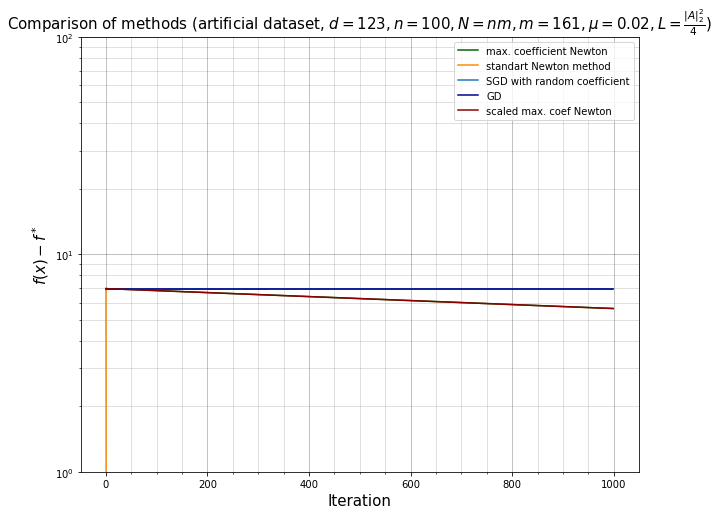

In [98]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd,
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD', color='darkblue')
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled, color='darkred', label='scaled max. coef Newton')

#plt.xlim([-0.01, 1.0])
plt.ylim([10**(0), 10**(2)])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (artificial dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{\|A\|^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.3)
plt.savefig('artificial_dataset11.png')
plt.show()

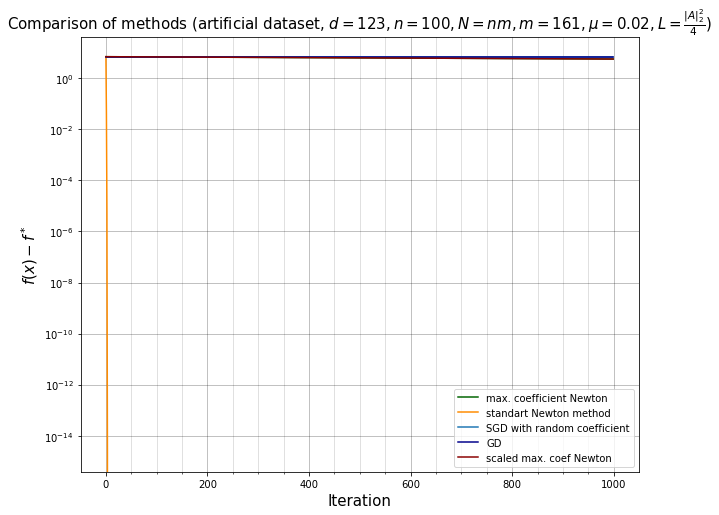

In [95]:
plt.figure(figsize=[10, 8])
pylab.semilogy(range(len(max_coef_newton)), max_coef_newton, color='darkgreen',
               label='max. coefficient Newton')
pylab.semilogy(range(len(stand_nm)), stand_nm, color='darkorange',label='standart Newton method')
pylab.semilogy(range(len(rand_gd)), rand_gd,
               label='SGD with random coefficient')
pylab.semilogy(range(len(stand_gd)), stand_gd, label='GD', color='darkblue')
pylab.semilogy(range(len(max_coef_scaled)), max_coef_scaled, color='darkred', label='scaled max. coef Newton')

#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(-4), 10**(3)])
plt.xlabel('Iteration',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title(r'Comparison of methods (artificial dataset, $d = 123, n = 100, N = nm, m = 161, \mu=0.02, L = \frac{\|A\|^2_2}{4})$',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.3)
plt.savefig('artificial_dataset21.png')
plt.show()

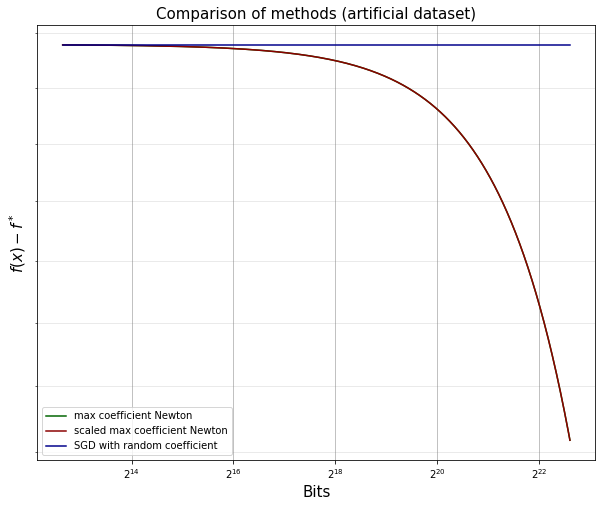

In [96]:
figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coefficient Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='scaled max coefficient Newton')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(2), 10**(3)])
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (artificial dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('artificial_dataset_bits11.png')
plt.show()

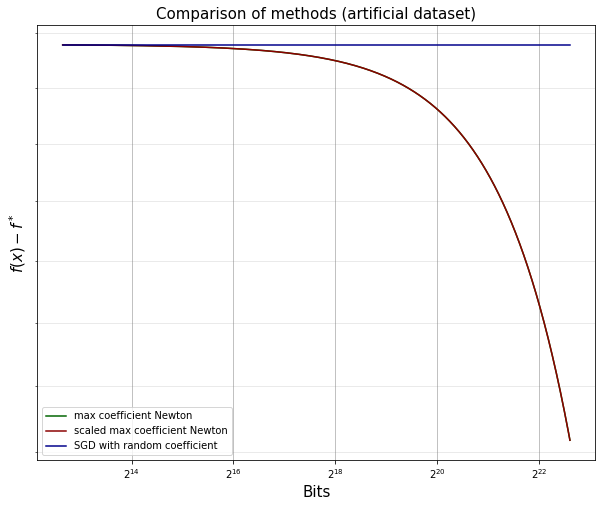

In [97]:

figure = plt.figure(figsize=[10, 8])
axes = figure.add_subplot (1, 1, 1)
pylab.plot(bits_max_coef, max_coef_newton, color='darkgreen',label='max coefficient Newton')
pylab.plot(scaled_max_coef, max_coef_scaled, color='darkred',label='scaled max coefficient Newton')
pylab.plot(bits_rand_gd, rand_gd, color='darkblue',label='SGD with random coefficient')
axes.set_yscale ('log', subsy = [2,4,6,8])
axes.set_xscale ('log', basex = 2, subsx = [2,4,6,8])
#plt.xlim([-0.01, 1.0])
#plt.ylim([10**(2), 10**(3)])
plt.xlabel('Bits',fontsize=15)
plt.ylabel('$f(x)-f^*$',fontsize=15)
plt.title('Comparison of methods (artificial dataset)',fontsize=15)
plt.legend(loc="best")
plt.minorticks_on()
plt.grid(which='major', color='black', alpha =0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.savefig('artificial_dataset_bits21.png')
plt.show()